## 输入、输出都进行归一化
#### 

In [1]:
import deepxde as dde
import numpy as np
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'

from deepxde.nn.pytorch.mionet import MIONetCartesianProd_4I
from deepxde.data.quadruple import QuadrupleCartesianProd_4I3O
from deepxde.data.quadruple import QuadrupleCartesianProd_MIMO
from deepxde.nn.pytorch.deeponet import DeepONetCartesianProd##########可以多输入多输出
import matplotlib.pyplot as plt
from deepxde.model import LossHistory
import numpy as np
# 定义模型保存路径
model_save_path = "../models0428/checkpoints/"
# model_save_path = "../models0428/checkpoints/"
from SCREW_test import screwModel
# 如果目录不存在，创建它
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)


import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


/home/lab422/422File/Class_2023/zt/2025/Adaptivedesign10/training
2.3.1+cu118
True
1


losshistory 和 train_state 已从指定路径加载。
losshistory.loss_train= [array([0.17502129], dtype=float32), array([0.03908006], dtype=float32), array([0.01593518], dtype=float32), array([0.01140443], dtype=float32), array([0.0094423], dtype=float32), array([0.0087683], dtype=float32), array([0.01302812], dtype=float32), array([0.00780301], dtype=float32), array([0.00666547], dtype=float32), array([0.0048747], dtype=float32), array([0.00268188], dtype=float32), array([0.00190428], dtype=float32), array([0.00211482], dtype=float32), array([0.00178319], dtype=float32), array([0.00158618], dtype=float32), array([0.00134513], dtype=float32), array([0.00120095], dtype=float32), array([0.0013909], dtype=float32), array([0.00118063], dtype=float32), array([0.00117976], dtype=float32), array([0.00078001], dtype=float32), array([0.00077239], dtype=float32), array([0.0007841], dtype=float32), array([0.00077913], dtype=float32), array([0.00058482], dtype=float32), array([0.00138531], dtype=float32), array([0

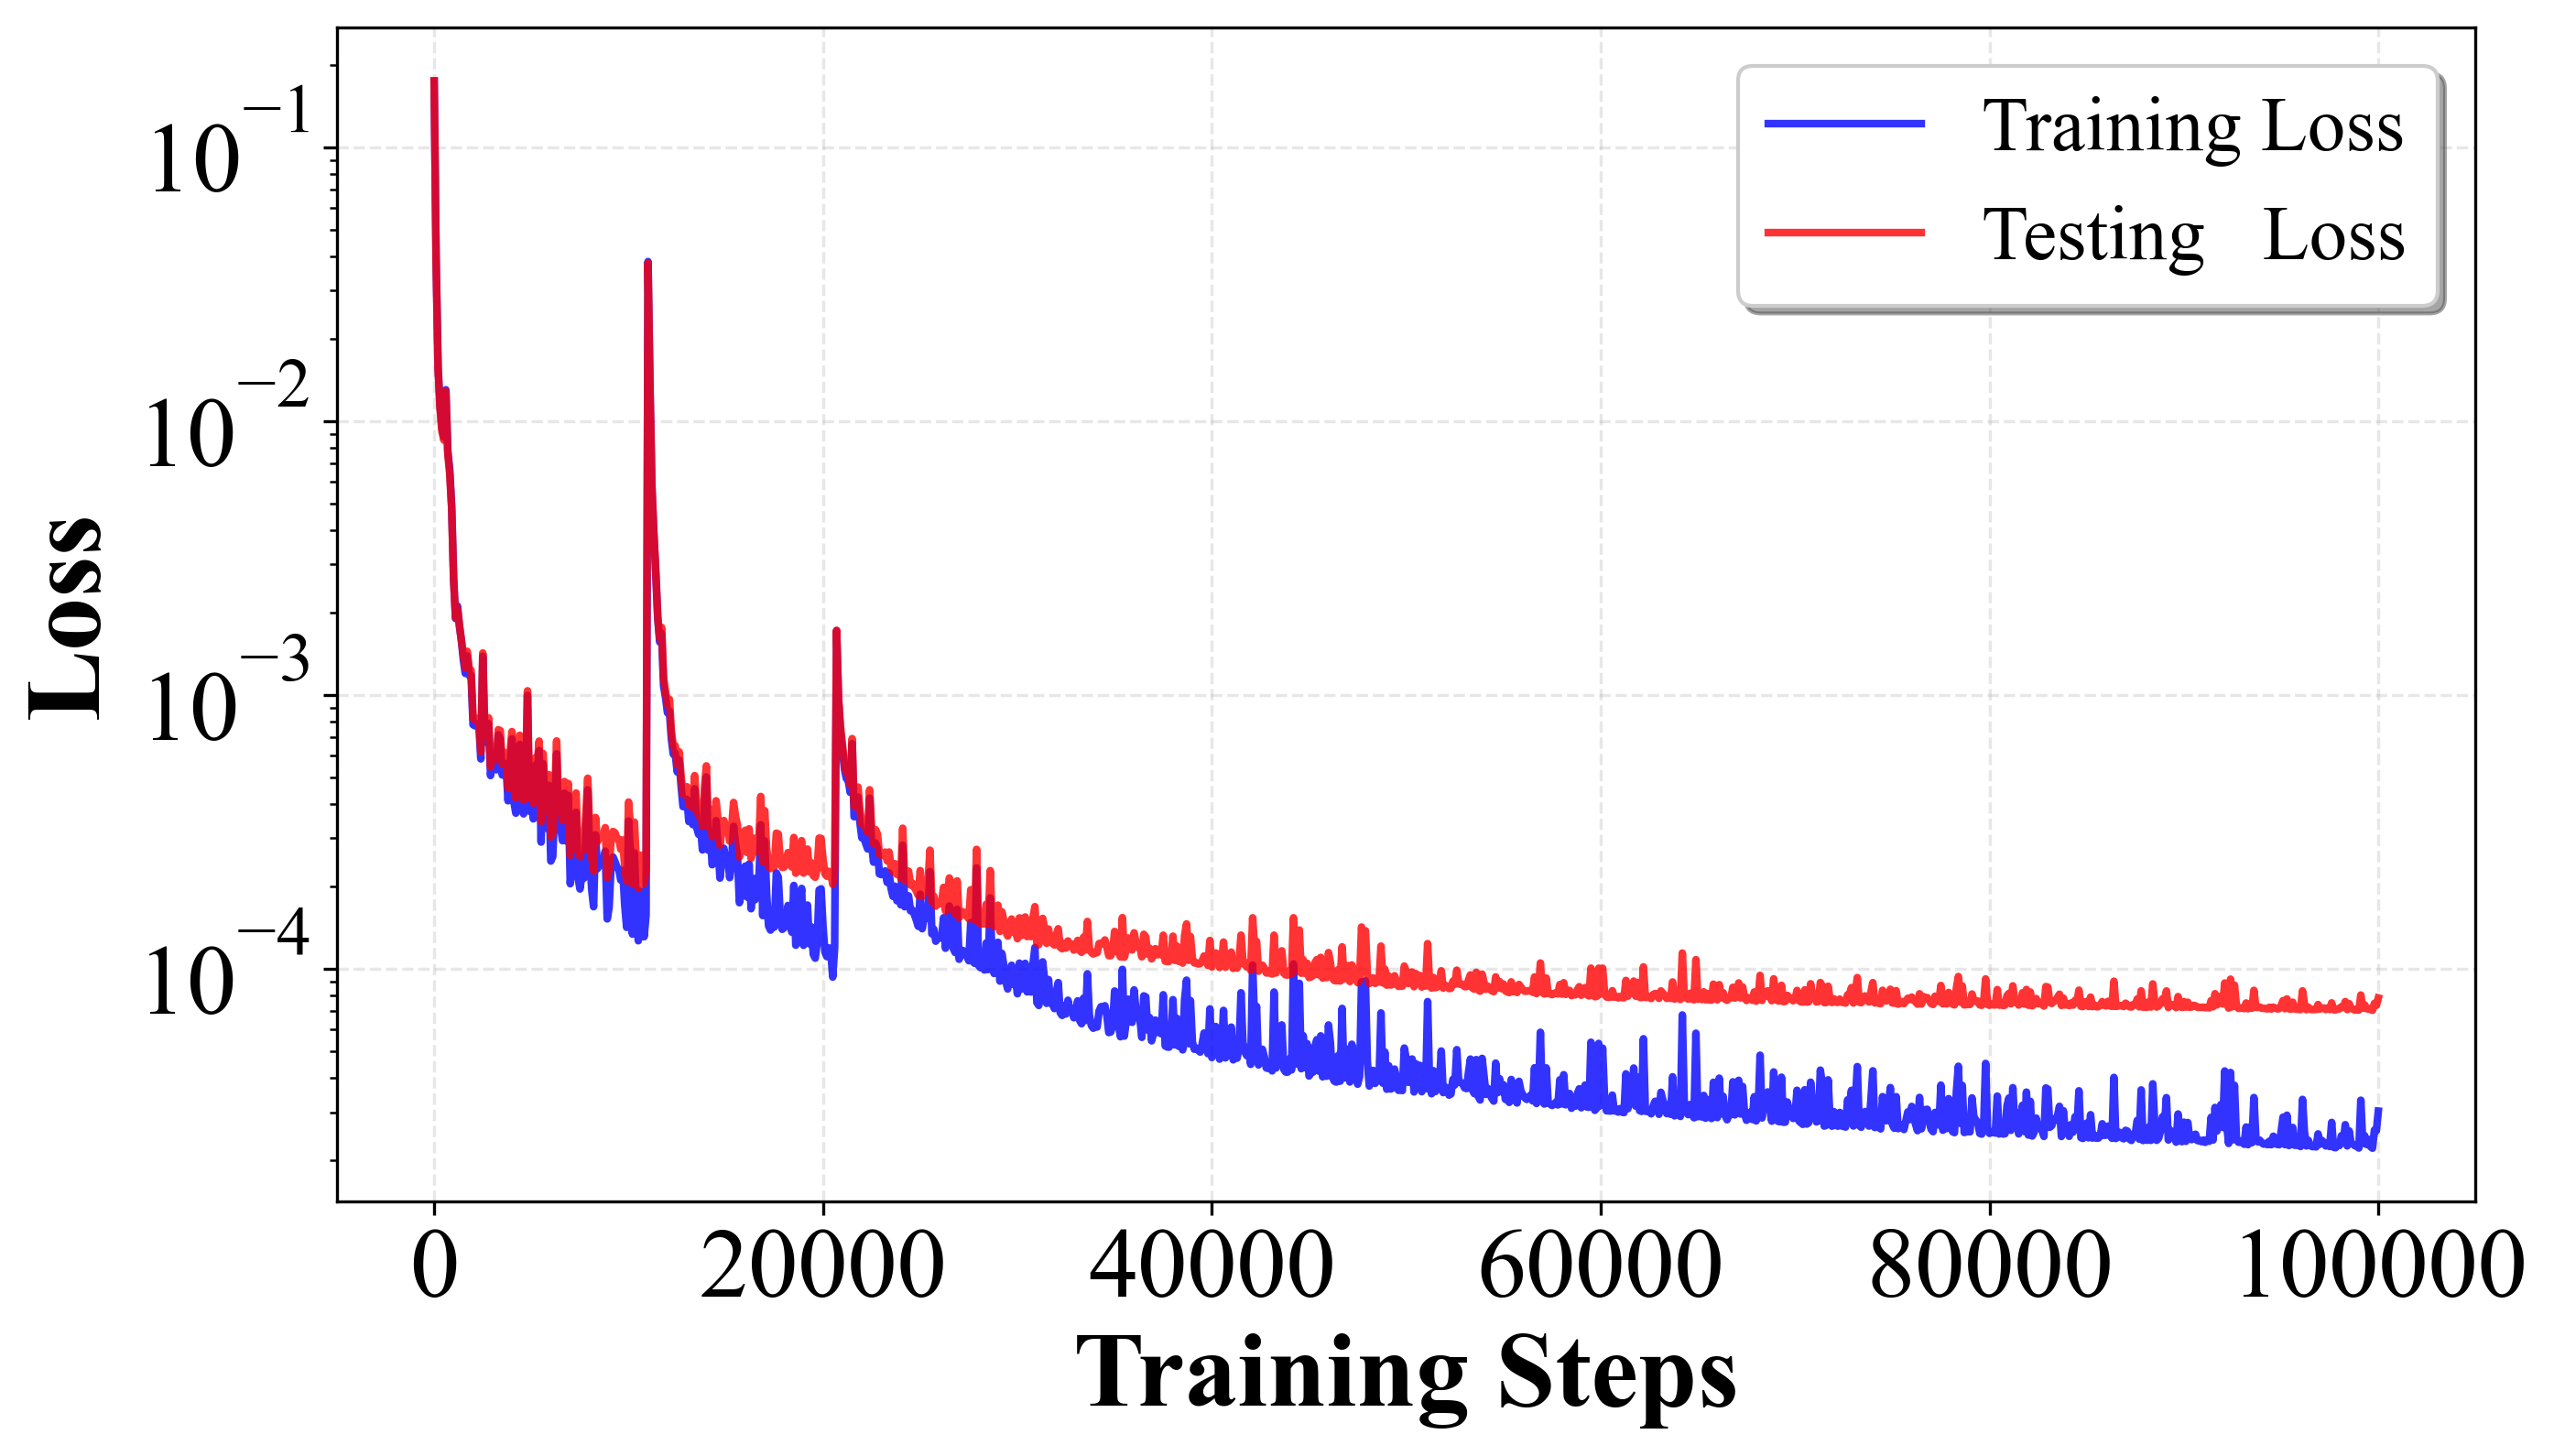

损失曲线图已保存至 ../models0428/checkpoints/


<Figure size 640x480 with 0 Axes>

In [2]:

import pickle
# 从指定路径加载 losshistory 和 train_state
with open(os.path.join(model_save_path, "losshistory.pkl"), "rb") as f:
    losshistory = pickle.load(f)

with open(os.path.join(model_save_path, "train_state.pkl"), "rb") as f:
    train_state = pickle.load(f)

print("losshistory 和 train_state 已从指定路径加载。")
import matplotlib.pyplot as plt
import numpy as np

# 设置论文级别的图形样式
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 26
plt.rcParams['ytick.labelsize'] = 26
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("losshistory.loss_train=",losshistory.loss_train)
print("type(losshistory.steps)=",type(losshistory.steps))

# 创建更规范的损失曲线图
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=300)

# 绘制训练和测试损失
steps = np.array(losshistory.steps)
train_loss = np.array(losshistory.loss_train)
test_loss = np.array(losshistory.loss_test)

# 可以选择显示全部数据或者前400步
max_steps = min(2000, len(steps)) if len(steps) > 400 else len(steps)
steps_plot = steps[:max_steps]
train_loss_plot = train_loss[:max_steps]
test_loss_plot = test_loss[:max_steps]

ax.plot(steps_plot, train_loss_plot, 'b-', label='Training Loss', alpha=0.8)
ax.plot(steps_plot, test_loss_plot, 'r-', label= 'Testing   Loss', alpha=0.8)

# 设置坐标轴
ax.set_xlabel('Training Steps', fontweight='bold',fontsize=28)
ax.set_ylabel('Loss', fontweight='bold',fontsize=28)
# ax.set_title('Training and Test Loss Curves', fontweight='bold', pad=20)

# 设置对数坐标（如果损失值变化范围很大）
ax.set_yscale('log')

# 添加网格
ax.grid(True, alpha=0.3, linestyle='--')

# 设置图例
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 保存高质量图片
plt.savefig(os.path.join(model_save_path, "training_loss_curve.png"), 
           dpi=300, bbox_inches='tight', format='png')
plt.savefig(os.path.join(model_save_path, "training_loss_curve.pdf"), 
           bbox_inches='tight', format='pdf')

print(f"损失曲线图已保存至 {model_save_path}")

In [3]:
training_data = np.load("../data/" + "Train0428_3000.npz", allow_pickle=True)

testing_data = np.load("../data/"+ "Test0428_500.npz", allow_pickle=True)
xt1 = np.load("../data/"+ "xt.npz", allow_pickle=True)

In [4]:
train_sensor_values1 = training_data['sensor_values1']  
train_sensor_values2 = training_data['sensor_values2']  
train_sensor_values3 = training_data['sensor_values3']  
train_xt = xt1['xt']
train_Ts =  training_data ['Ts']
train_fps =  training_data ['fps']
train_lts =  training_data ['ltss']

train_mu1s =  training_data ['mu1s']
train_mu2s =  training_data ['mu2s']
train_alphas =  training_data ['alphas']


#result_multiple = torch.cat((tensor1, tensor3), dim=0)

test_sensor_values1 = testing_data['sensor_values1']  
test_sensor_values2 = testing_data['sensor_values2']  
test_sensor_values3 = testing_data['sensor_values3']  
test_xt = xt1['xt']  
test_Ts =  testing_data ['Ts']
test_fps =  testing_data ['fps']
test_lts =  testing_data ['ltss']

test_mu1s =  testing_data ['mu1s']
test_mu2s =  testing_data ['mu2s']
test_alphas =  testing_data ['alphas']


print(type(test_mu1s))

print("train_sensor_values1",train_sensor_values1.shape) 
print("train_sensor_values2",train_sensor_values2.shape) 
print("train_sensor_values3",train_sensor_values3.shape) 
print("train_xt",train_xt.shape)





<class 'numpy.ndarray'>
train_sensor_values1 (3000, 200)
train_sensor_values2 (3000, 200)
train_sensor_values3 (3000, 200)
train_xt (40000, 2)


In [5]:
#print("train_sensor_values1=",train_sensor_values1)#对
#print("train_sensor_values2=",train_sensor_values2)
#print("train_sensor_values3=",train_sensor_values3)
#print("train_xt=",train_xt)
#print("train_Ts=",train_Ts*100)
#print("train_fps=",train_fps/5)
#print("train_lts=",train_lts)

#print("test_sensor_values1=",test_sensor_values1)
#print("test_sensor_values2=",test_sensor_values2)
#print("test_sensor_values3=",test_sensor_values3)
#print("test_xt=",test_xt)
#print("test_Ts=",test_Ts)
#print("test_fps=",test_fps)
#print("test_lts=",test_lts)


In [6]:
train_sensor_values1 = train_sensor_values1.astype(np.float32) 
train_sensor_values2 = train_sensor_values2.astype(np.float32) 
train_sensor_values3 = train_sensor_values3.astype(np.float32) 
train_xt=train_xt.astype(np.float32) 
train_Ts =  train_Ts.astype(np.float32) 
train_fps =  train_fps.astype(np.float32) 
train_lts =  train_lts.astype(np.float32) 


train_mu1s =  train_mu1s.astype(np.float32) 
train_mu2s =  train_mu2s.astype(np.float32) 
train_alphas =  train_alphas.astype(np.float32) 

test_sensor_values1 = test_sensor_values1.astype(np.float32) 
test_sensor_values2 = test_sensor_values2.astype(np.float32)
test_sensor_values3 = test_sensor_values3.astype(np.float32)
test_xt=test_xt.astype(np.float32) 
test_Ts =  test_Ts.astype(np.float32) 
test_fps =  test_fps.astype(np.float32) 
test_lts =  test_lts.astype(np.float32) 

test_mu1s =  test_mu1s.astype(np.float32) 
test_mu2s =  test_mu2s.astype(np.float32) 
test_alphas =  test_alphas.astype(np.float32) 





#归化量级
scale_factor1 = 100  # 输出量级较大
scale_factor2 = 5
scale_mu1=1e4
scale_mu2=1e7
scale_alpha=2

scale_xt=10


train_sensor_values2=train_sensor_values2*scale_factor1
test_sensor_values2= test_sensor_values2 *scale_factor1
train_sensor_values3=train_sensor_values3/ scale_factor1
test_sensor_values3=test_sensor_values3/scale_factor1
train_Ts=train_Ts/scale_factor1
test_Ts=test_Ts/scale_factor1

train_fps=train_fps*scale_factor2
test_fps=test_fps*scale_factor2


train_mu1s =  train_mu1s[:,0]*scale_mu1#train_mu1s.shape= (1000,)
test_mu1s =  test_mu1s[:,0]*scale_mu1

train_mu2s =  train_mu2s[:,0]*scale_mu2#train_mu2s.shape= (1000,)
test_mu2s =  test_mu2s[:,0]*scale_mu2
train_alphas =  train_alphas[:,0]/scale_alpha
test_alphas =  test_alphas[:,0]/scale_alpha


train_xt=train_xt/scale_xt
test_xt=test_xt/scale_xt


In [7]:
def normalize_global(data, feature_range=(0, 1)):
    """
    对整个数组进行全局归一化，将所有数据缩放到指定范围。

    参数:
        data (numpy.ndarray): 输入数据，形状为 (n_samples, n_features)。
        feature_range (tuple): 目标范围 (min, max)，默认为 (0, 1)。

    返回:
        normalized_data (numpy.ndarray): 归一化后的数据。
        global_min (float): 数据的全局最小值，用于反归一化。
        global_max (float): 数据的全局最大值，用于反归一化。
    """
    min_val, max_val = feature_range
    global_min = np.min(data)
    global_max = np.max(data)
    
    # 防止除以零
    scale = global_max - global_min
    if scale == 0:
        scale = 1
    
    normalized_data = (data - global_min) / scale
    normalized_data = normalized_data * (max_val - min_val) + min_val
    
    return normalized_data, global_min, global_max

def inverse_normalize_global(normalized_data, global_min, global_max, feature_range=(0, 1)):
    """
    对全局归一化后的数据进行反归一化，还原到原始范围。

    参数:
        normalized_data (numpy.ndarray): 归一化后的数据。
        global_min (float): 数据的全局最小值，用于反归一化。
        global_max (float): 数据的全局最大值，用于反归一化。
        feature_range (tuple): 原归一化的范围 (min, max)，默认为 (0, 1)。

    返回:
        original_data (numpy.ndarray): 还原后的原始数据。
    """
    min_val, max_val = feature_range
    
    scale = global_max - global_min
    if scale == 0:
        scale = 1
    
    original_data = (normalized_data - min_val) / (max_val - min_val)
    original_data = original_data * scale + global_min
    
    return original_data

In [8]:
train_sensor_values1_scale,Nt_min,Nt_max=normalize_global(train_sensor_values1)
test_sensor_values1_scale=(test_sensor_values1 - Nt_min) / (Nt_max - Nt_min)
# normalized_test_data = normalized_test_data * (1 - 0) + 0  # 这里 feature_range 是 (0, 1)

train_sensor_values2_scale,Fin_min,Fin_max=normalize_global(train_sensor_values2)
test_sensor_values2_scale=(test_sensor_values2 - Fin_min) / (Fin_max - Fin_min)

train_sensor_values3_scale,Tb_min,Tb_max=normalize_global(train_sensor_values3)
test_sensor_values3_scale=(test_sensor_values3 - Tb_min) / (Tb_max - Tb_min)

print("train_sensor_values1_scale",train_sensor_values1_scale)
print("Nt_min",Nt_min)
print("Nt_max",Nt_max)
print("train_sensor_values2_scale",train_sensor_values2_scale)
print("Fin_min",Fin_min)
print("Fin_max",Fin_max)
print("train_sensor_values3_scale",train_sensor_values3_scale)
print("Tb_min",Tb_min)
print("Tb_max",Tb_max)

train_mu1s_scale,mu1_min,mu1_max =  normalize_global(train_mu1s[:,0])
test_mu1s_scale = (test_mu1s[:,0] - mu1_min) / (mu1_max - mu1_min)
train_mu2s_scale,mu2s_min,mu2s_max  =  normalize_global(train_mu2s[:,0])
test_mu2s_scale = (test_mu2s[:,0] - mu2s_min) / (mu2s_max - mu2s_min)
train_alphas_scale,alphas_min,alphas_max =  normalize_global(train_alphas[:,0])
test_alphas_scale = (test_alphas[:,0] - alphas_min) / (alphas_max - alphas_min)


print("train_mu1s",train_sensor_values3_scale)
print("mu1_min",mu1_min)
print("mu1_max",mu1_max)

print("train_mu2s_scale",train_mu2s_scale)
print("mu2s_min",mu2s_min)
print("mu2s_max",mu2s_max)

print("train_alphas_scale",train_alphas_scale)
print("alphas_min",alphas_min)
print("alphas_max",alphas_max)


train_Ts_scale,Ts_min,Ts_max =  normalize_global(train_Ts)
train_fps_scale,fps_min,fps_max =  normalize_global(train_fps)
train_lts_scale,lts_min,lts_max =  normalize_global(train_lts)

test_Ts_scale = (test_Ts - Ts_min) / (Ts_max - Ts_min)
test_fps_scale =  (test_fps - fps_min) / (fps_max - fps_min)
test_lts_scale =  (test_lts - lts_min) / (lts_max - lts_min)





#test_mu1s =  normalize_global(test_mu1s[:,0])
#test_mu2s =  test_mu2s[:,0]*scale_mu2
#test_alphas =  test_alphas[:,0]/scale_alpha




train_sensor_values1_scale [[0.00000000e+00 3.89827490e-02 7.77366161e-02 ... 6.49281561e-01
  6.37019873e-01 6.24668360e-01]
 [2.44281605e-01 2.41727039e-01 2.38972351e-01 ... 9.72284317e-01
  9.81639206e-01 9.90866840e-01]
 [1.00000000e+00 9.90159214e-01 9.80100632e-01 ... 9.08552825e-01
  9.10603523e-01 9.12312508e-01]
 ...
 [9.55685139e-01 9.61528957e-01 9.67105389e-01 ... 8.96626711e-02
  9.90412235e-02 1.08828306e-01]
 [6.88196898e-01 6.92890823e-01 6.97350502e-01 ... 1.20214617e-03
  7.91668892e-04 3.91880661e-04]
 [7.83890486e-01 7.87076652e-01 7.90244281e-01 ... 1.48242950e-01
  1.60083219e-01 1.72323629e-01]]
Nt_min 3.0
Nt_max 9.0
train_sensor_values2_scale [[1.00000000e+00 9.95508909e-01 9.91095781e-01 ... 7.60145544e-04
  3.08640330e-04 7.40960313e-05]
 [1.06986657e-01 1.10365123e-01 1.13561496e-01 ... 9.96090055e-01
  9.97538745e-01 9.98828292e-01]
 [8.33210826e-01 8.10916305e-01 7.88551450e-01 ... 7.80746400e-01
  7.65040994e-01 7.49078155e-01]
 ...
 [3.94555986e-01 3.920

In [9]:

# 将 numpy 数组转换为 torch 张量
train_mu1s_tensor = torch.tensor(train_mu1s_scale)
train_mu2s_tensor = torch.tensor(train_mu2s_scale)
train_alphas_tensor = torch.tensor(train_alphas_scale)
test_mu1s_tensor = torch.tensor(test_mu1s_scale)
test_mu2s_tensor = torch.tensor(test_mu2s_scale)
test_alphas_tensor = torch.tensor(test_alphas_scale)

train_params = torch.stack((train_mu1s_tensor, train_mu2s_tensor, train_alphas_tensor), dim=1)
test_params = torch.stack((test_mu1s_tensor, test_mu2s_tensor, test_alphas_tensor), dim=1)


In [10]:
print("train_sensor_values1.shape=",train_sensor_values1.shape)
print("train_sensor_values2.shape=",train_sensor_values2.shape)
print("train_sensor_values3.shape=",train_sensor_values3.shape)



print("train_mu1s_tensor.shape=",train_mu1s_tensor.shape)
print("train_mu2s_tensor.shape=",train_mu2s_tensor.shape)
print("train_alphas_tensor.shape=",train_alphas_tensor.shape)

print("train_params.shape=",train_params.shape)
print("test_params.shape=",test_params.shape)



train_sensor_values1.shape= (3000, 200)
train_sensor_values2.shape= (3000, 200)
train_sensor_values3.shape= (3000, 200)
train_mu1s_tensor.shape= torch.Size([3000])
train_mu2s_tensor.shape= torch.Size([3000])
train_alphas_tensor.shape= torch.Size([3000])
train_params.shape= torch.Size([3000, 3])
test_params.shape= torch.Size([500, 3])


In [11]:

#####组合输出数据
# 将 NumPy 数组转换为 PyTorch 张量
train_Ts = torch.from_numpy(train_Ts_scale)
train_fps = torch.from_numpy(train_fps_scale)
train_lts = torch.from_numpy(train_lts_scale)

y_train=torch.cat((train_Ts, train_fps), dim=0)
y_train=torch.cat((y_train, train_lts), dim=0)
y_train=y_train.numpy()

#result_multiple = torch.cat((tensor1, tensor3), dim=0)


test_Ts = torch.from_numpy(test_Ts_scale)
test_fps = torch.from_numpy(test_fps_scale)
test_lts = torch.from_numpy(test_lts_scale)
y_test=torch.cat((test_Ts, test_fps), dim=0)
y_test=torch.cat((y_test, test_lts), dim=0)
y_test=y_test.numpy()




In [12]:
X_train=(train_sensor_values1_scale,train_sensor_values2_scale,train_sensor_values3_scale,train_params,train_xt)
X_test=(test_sensor_values1_scale,test_sensor_values2_scale,test_sensor_values3_scale,test_params,test_xt)

#X_train=(train_sensor_values1,train_sensor_values2,train_sensor_values3,train_xt)
#X_test=(test_sensor_values1,test_sensor_values2,test_sensor_values3,test_xt)

print("len(X_train)=",len(X_train))
print("len(X_test)=",len(X_test))
print("len(X_train[0])=",len(X_train[0]))
print("len(X_train[1])=",len(X_train[1]))
print("len(X_train[2])=",len(X_train[2]))
print("len(X_train[3])=",len(X_train[3]))

print("len(y_train)=",len(y_train))
print("y_train.size=",y_train.size)

len(X_train)= 5
len(X_test)= 5
len(X_train[0])= 3000
len(X_train[1])= 3000
len(X_train[2])= 3000
len(X_train[3])= 3000
len(y_train)= 9000
y_train.size= 360000000


In [13]:

m = 200
tmax=200
#lr = 0.0002 if problem in ["ADVD"] else 0.001
lr=0.002
iterations = 100000
#activation = (["relu", None, "relu"] if problem in ["ADVD"] else ["relu", "relu", "relu"])
activation = (["relu", "relu", "relu", "relu","relu"])
initializer = "Glorot normal"


branch_net1 = [200, 800,800,800,800,800,800,800, 600]
branch_net2 = [200, 800,800,800,800,800,800,800, 600]
branch_net3 = [3,   800,800,800,800,800,800,800, 600]
trunk_net   = [2,   800,800,800,800,800,800,800, 200]

#data = QuadrupleCartesianProd_4I3O(X_train, y_train, X_test, y_test)#这是个类

data =QuadrupleCartesianProd_4I3O(X_train, y_train, X_test, y_test)


In [14]:
net = MIONetCartesianProd_4I(
    branch_net1,
    branch_net1,
    branch_net2,
    branch_net3,
    trunk_net,
    {"branch1": activation[0], "branch2": activation[1], "branch3": activation[2],"branch4": activation[3], "trunk": activation[4]},
    "Glorot normal",
    regularization = ["l2", 0.00000001],
)

model = dde.Model(data, net)
model.compile("adam", lr=lr,decay=("inverse time", 1, 1e-4),metrics=["mean l2 relative error"])


Compiling model...
'compile' took 0.311703 s



In [15]:
IMPORT_PATH = os.getcwd()
IMPORT_PATH1=os.path.join(os.path.join(IMPORT_PATH,"models0428"),"mionet_model.ckpt-77000.pt")
model.restore(IMPORT_PATH1, device="cuda", verbose=1)


Restoring model from /home/lab422/422File/Class_2023/zt/2025/Adaptivedesign10/training/models0428/mionet_model.ckpt-77000.pt ...





y_pred = model.predict(X_test)#y_pred.shape= (3, 40000)


print("y_pred",y_pred.shape)
mse = np.mean((y_pred - y_test) ** 2)
norm_y_test = np.linalg.norm(y_test)

rmse = np.sqrt(mse) / norm_y_test
print("Relative Mean Squared Error (RMSE):", rmse)


In [16]:
# 预测单个点
sensor_values1 = np.array([[(250/60-Nt_min)/(Nt_max-Nt_min)] * tmax])  # 分支网络 1 的输入#250/60
sensor_values2 = np.array([[(0.065-Fin_min)/(Fin_max-Fin_min)] * tmax])  # 分支网络 2 的输入270/3600

sensor_values3 = np.array(np.concatenate([
    np.full(m // 4, (295-Tb_min)/(Tb_max-Tb_min) ),
    np.full(m // 4, (305-Tb_min)/(Tb_max-Tb_min)  ),
    np.full(m // 4, (315-Tb_min)/(Tb_max-Tb_min)  ),
    np.full(m // 4, (325-Tb_min)/(Tb_max-Tb_min)  )])).reshape(1,-1)


xt = np.array([[1.99, 50]])            
train_params = torch.stack((train_mu1s_tensor, train_mu2s_tensor, train_alphas_tensor), dim=1)
mu1=np.array([(0.0858 -mu1_min)/(mu1_max-mu1_min)])
mu2=np.array([(0.9142 -mu2s_min)/(mu2s_max-mu2s_min)])
alpha=np.array([(10.41-alphas_min)/(alphas_max-alphas_min)])
test_param=np.concatenate((mu1,mu2,alpha)).reshape(1,3)


# 组合输入数据
X_time_specific = (sensor_values1, sensor_values2, sensor_values3,test_param, xt)

# 预测特定时间和空间点的值
y_pred_time_specific = model.predict(X_time_specific)

Ts_predict=inverse_normalize_global(y_pred_time_specific[0,:],Ts_min,Ts_max )
fps_predict=inverse_normalize_global(y_pred_time_specific[1,:],fps_min,fps_max)
lts_predict=inverse_normalize_global(y_pred_time_specific[2,:],lts_min,lts_max)

#print("y_pred_time_specific",y_pred_time_specific)

print("test_param",test_param)
print("type(test_param)=",type(test_param))
print("test_param.shape=",test_param.shape)
print("type(sensor_values1)=",type(sensor_values1))

# 输出预测值
print(f"Predicted Ts_predict   : {Ts_predict}")
print(f"Predicted fps_predict   : {fps_predict}")
print(f"Predicted lts_predict   : {lts_predict}")

test_param [[0.42625801 0.45442986 0.39203918]]
type(test_param)= <class 'numpy.ndarray'>
test_param.shape= (1, 3)
type(sensor_values1)= <class 'numpy.ndarray'>
Predicted Ts_predict   : [294.8261]
Predicted fps_predict   : [0.4301331]
Predicted lts_predict   : [1.2350433]


In [17]:
# 预测整个区域
sensor_values1 = np.array([[(7-Nt_min)/(Nt_max-Nt_min)] * tmax])  # 分支网络 1 的输入#250/60
sensor_values2 = np.array([[(0.07-Fin_min)/(Fin_max-Fin_min)] * tmax])  # 分支网络 2 的输入270/3600

sensor_values3 = np.array(np.concatenate([
    np.full(m // 4, (295-Tb_min)/(Tb_max-Tb_min) ),
    np.full(m // 4, (305-Tb_min)/(Tb_max-Tb_min)  ),
    np.full(m // 4, (315-Tb_min)/(Tb_max-Tb_min)  ),
    np.full(m // 4, (325-Tb_min)/(Tb_max-Tb_min)  )])).reshape(1,-1)


#xt = np.array([[0.5, 180]])            
train_params = torch.stack((train_mu1s_tensor, train_mu2s_tensor, train_alphas_tensor), dim=1)
mu1=np.array([(0.0858 -mu1_min)/(mu1_max-mu1_min)])
mu2=np.array([(0.9142 -mu2s_min)/(mu2s_max-mu2s_min)])
alpha=np.array([(10.41-alphas_min)/(alphas_max-alphas_min)])
test_param=np.concatenate((mu1,mu2,alpha)).reshape(1,3)




# 组合输入数据
X_time_specific = (sensor_values1, sensor_values2, sensor_values3,test_param, test_xt)#test_xt

# 预测特定时间和空间点的值
y_pred_time_specific = model.predict(X_time_specific)
Ts_predict=inverse_normalize_global(y_pred_time_specific[0,:].reshape(tmax,200),Ts_min,Ts_max )
fps_predict=inverse_normalize_global(y_pred_time_specific[1,:].reshape(tmax,200),fps_min,fps_max)
lts_predict=inverse_normalize_global(y_pred_time_specific[2,:].reshape(tmax,200),lts_min,lts_max)


# # 输出预测值
# print(f"Predicted Ts_predict   : {Ts_predict}")
# print(f"Predicted fps_predict   : {fps_predict}")
# print(f"Predicted lts_predict   : {lts_predict}")

In [18]:
# 画出预测的图## 用原始模型产生的数值解做对比

## 用原始模型产生的数值解做对比

In [19]:
# ============================================================
# 设置matplotlib全局样式 - 符合科研论文发表标准
# ============================================================
import matplotlib as mpl

# 设置字体
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
plt.rcParams['font.size'] = 12

# 设置图形质量
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['savefig.bbox'] = 'tight'

# 设置线条和标记
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6

# 设置坐标轴
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

# 设置图例
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.framealpha'] = 0.9

# 设置刻度
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2

print("✓ Matplotlib style configured for scientific publication standards")


✓ Matplotlib style configured for scientific publication standards


In [20]:
Z=200
tmax=180
dt=1
Nt=7#250/60
Fin=0.07#270/3600
Tb0=[295,305,315,325]
screw_model = screwModel(Z,tmax,dt,Nt,Fin,Tb0)
xx,tt,fp,Ts,lt0,sensor1,sensor2,sensor3 = screw_model.solve()

print("Ts",Ts.shape)


Ts (180, 200)


In [21]:
tmax=180
# 计算均方误差 (MSE)
Ts_predict=Ts_predict[:tmax,:]
mse = np.mean((Ts_predict- Ts) ** 2)
rmse = np.sqrt(np.mean((Ts_predict - Ts) ** 2))
rrmse = rmse / np.mean(np.abs(Ts))
mae = np.mean(np.abs(Ts_predict - Ts))
print(mse)
print(rmse)
print(rrmse)
print(mae)

print("Ts_predict",Ts_predict.shape)

0.03721749996640206
0.1929183764352221
0.0006396296810123862
0.13247768042441063
Ts_predict (180, 200)


In [22]:
fps_predict=fps_predict[:tmax,:]
mse = np.mean((fps_predict - fp) ** 2)
rmse = np.sqrt(np.mean((fps_predict - fp) ** 2))
rrmse = rmse / np.mean(np.abs(fp))
mae = np.mean(np.abs(fps_predict - fp))#lts_predict
print(mse)
print(rmse)
print(rrmse)
print(mae)


6.173845932614862e-05
0.007857382472945339
0.021424298716312868
0.005912808200325201


In [23]:
lts_predict=lts_predict[:tmax,0]
mse = np.mean((lts_predict - lt0) ** 2)
rmse = np.sqrt(np.mean((lts_predict - lt0) ** 2))
rrmse = rmse / np.mean(np.abs(lt0))
mae = np.mean(np.abs(lts_predict - lt0))
print(mse)
print(rmse)
print(rrmse)
print(mae)



2.3140413092785336e-05
0.004810448325549848
0.004046102849055842
0.0035530122412562545


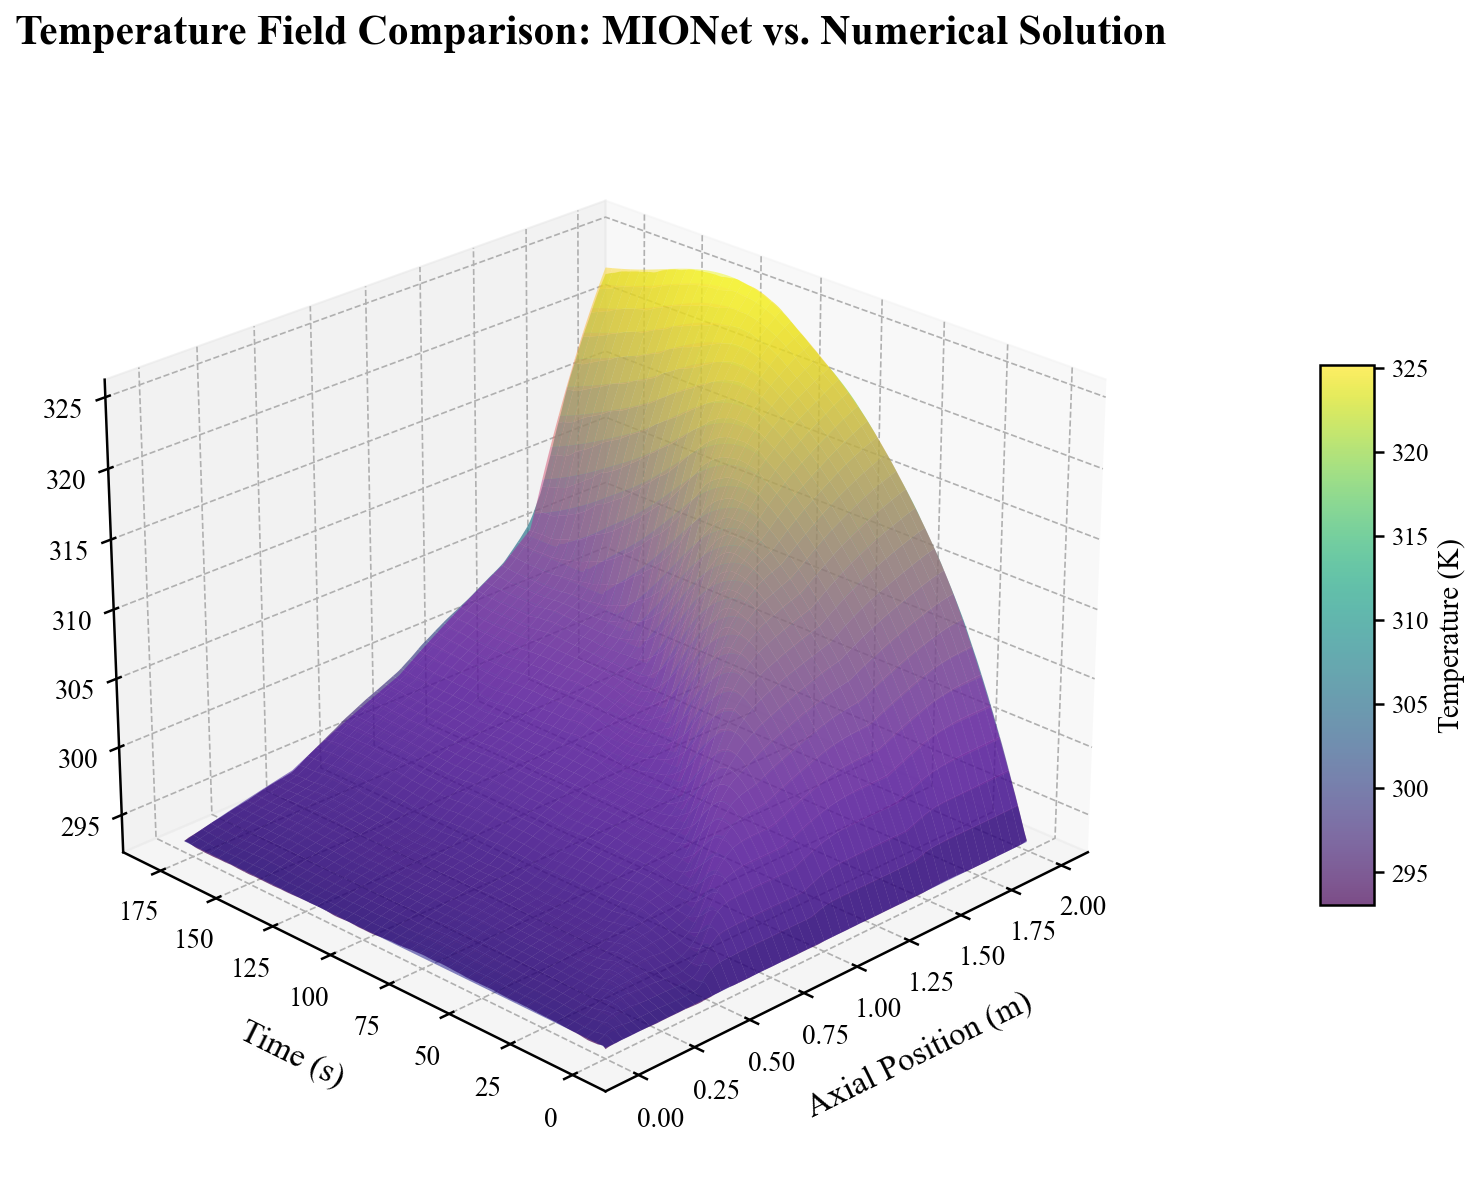

Temperature Field Metrics:
  MSE:   0.037217 K²
  RMSE:  0.192918 K
  RRMSE: 0.000640
  MAE:   0.132478 K


In [24]:
# ============================================================
# 图1: 螺杆温度场 Ts 预测值与数值解对比 (3D Surface)
# ============================================================
time = np.arange(0, tmax, dt)
x = np.linspace(0, 2, Z + 1)
space = x[:-1]
X, Y = np.meshgrid(space, time)

fig1 = plt.figure(figsize=(14, 8), dpi=150)
ax1 = fig1.add_subplot(111, projection='3d')

# 绘制预测值和数值解
surf1 = ax1.plot_surface(X, Y, Ts_predict, cmap='viridis', alpha=0.7, 
                          linewidth=0, antialiased=True, label='MIONet Prediction')
surf2 = ax1.plot_surface(X, Y, Ts, cmap='plasma', alpha=0.5, 
                          linewidth=0, antialiased=True, label='Numerical Solution')

# 设置标题和标签 (使用科研论文规范,放大字体)
ax1.set_title('Temperature Field Comparison: MIONet vs. Numerical Solution', 
              fontsize=20, fontweight='bold', pad=25)
ax1.set_xlabel('Axial Position (m)', fontsize=16, labelpad=12)
ax1.set_ylabel('Time (s)', fontsize=16, labelpad=12)
ax1.set_zlabel('Temperature (K)', fontsize=16, labelpad=18)

# 设置视角和网格
ax1.view_init(elev=25, azim=225)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# 设置刻度标签字体大小
ax1.tick_params(labelsize=13)

# 添加颜色条
cbar = fig1.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Temperature (K)', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# 计算误差统计(仅用于打印,不显示在图上)
mse_ts = np.mean((Ts_predict - Ts) ** 2)
rmse_ts = np.sqrt(mse_ts)
rrmse_ts = rmse_ts / np.mean(np.abs(Ts))
mae_ts = np.mean(np.abs(Ts_predict - Ts))

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.show()

print(f"Temperature Field Metrics:")
print(f"  MSE:   {mse_ts:.6f} K²")
print(f"  RMSE:  {rmse_ts:.6f} K")
print(f"  RRMSE: {rrmse_ts:.6f}")
print(f"  MAE:   {mae_ts:.6f} K")


In [25]:
# # 在第二个子图中绘制 Ts_predict 和 Ts 的误差
# fig2 = plt.figure(figsize=(12, 8))

# # 创建第二个子图
# ax2 = fig2.add_subplot(111, projection='3d')

# # 绘制误差图：Ts_predict 和 Ts 之间的差异
# error = Ts_predict[:200,:] - Ts
# ax2.plot_surface(X, Y, error, cmap='coolwarm', alpha=0.8)

# ax2.set_title('Difference between Ts_predict and Ts')
# ax2.set_xlabel('Space')
# ax2.set_ylabel('Time')
# ax2.set_zlabel('Error')
# ax2.view_init(elev=30, azim=10)
# plt.show()


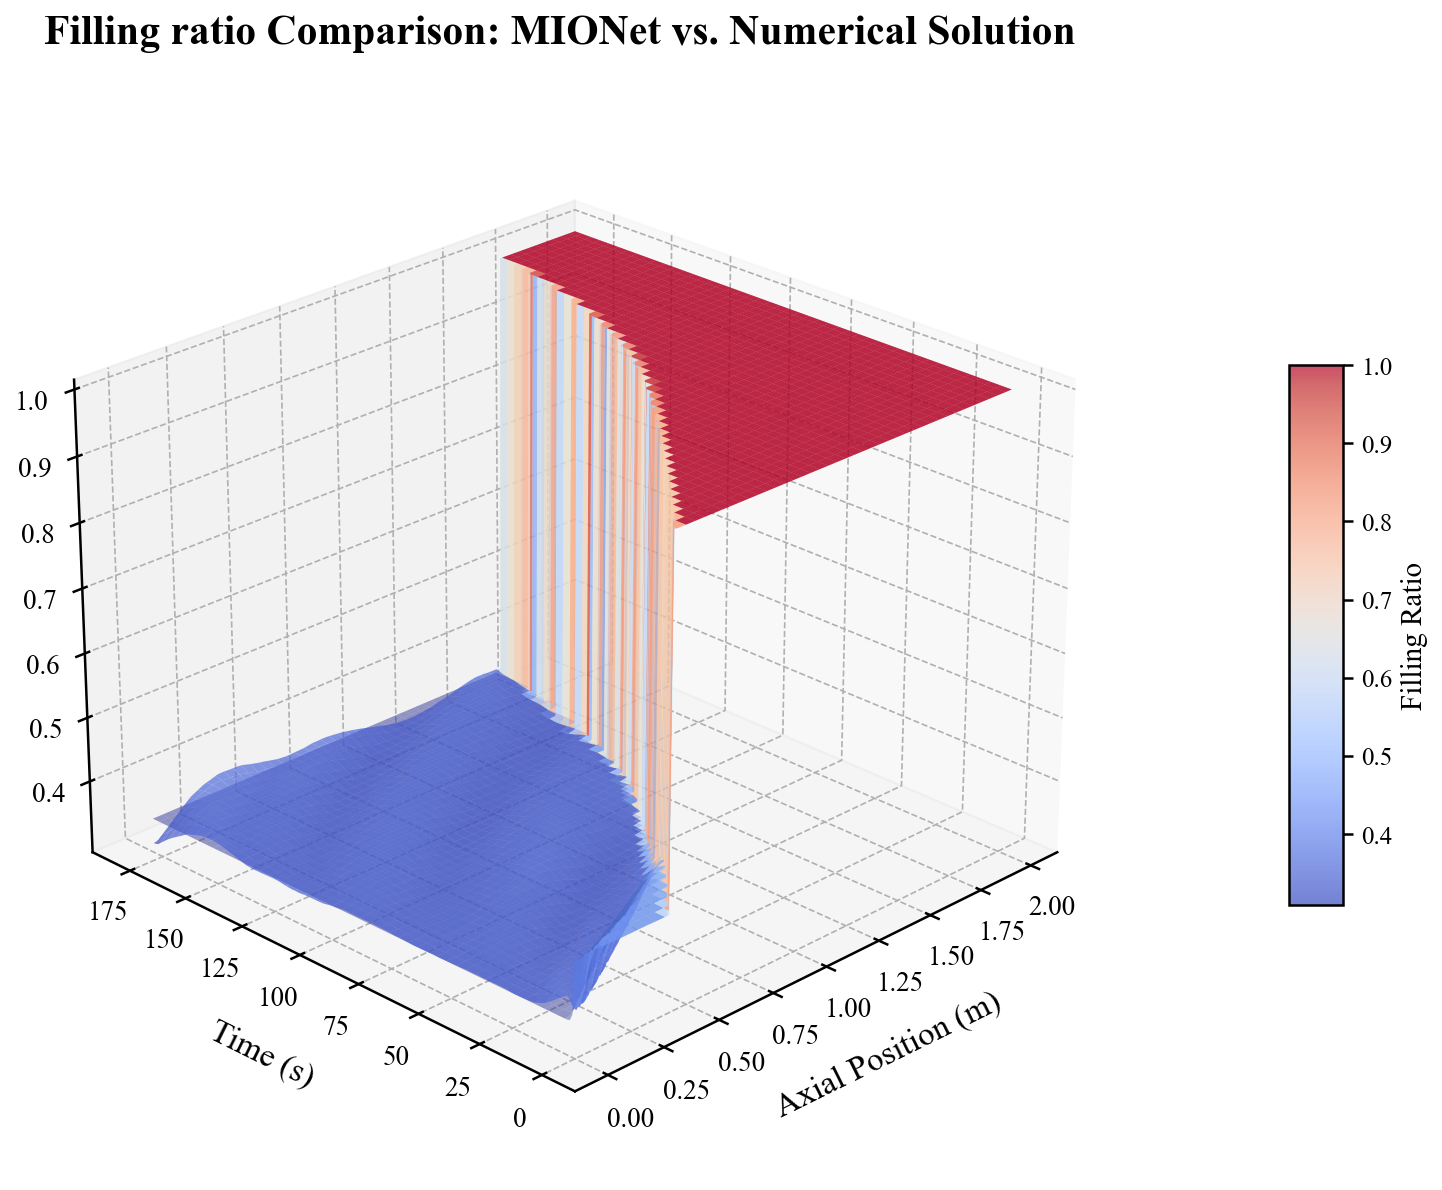

Filling Ratio Metrics:
  MSE:   0.00079339
  RMSE:  0.02816717
  RRMSE: 0.04600003
  MAE:   0.00525591


In [26]:
# ============================================================
# 图2: 固相分数 fps 预测值与数值解对比 (3D Surface)
# ============================================================
L = 2
fps_predict0 = np.ones((tmax, Z))
fps0 = np.ones((tmax, Z))

# 根据界面位置设置固相分数
for i in range(tmax):
    K_predict = int(np.floor(lts_predict[i] / (L / Z)))
    fps_predict0[i, :K_predict] = fps_predict[i, :K_predict]
    K = int(np.floor(lt0[i] / (L / Z)))
    fps0[i, :K] = fp[i, :K]

fig2 = plt.figure(figsize=(14, 8), dpi=150)
ax2 = fig2.add_subplot(111, projection='3d')

# 绘制预测值和数值解
surf1 = ax2.plot_surface(X, Y, fps_predict0, cmap='coolwarm', alpha=0.7,
                          linewidth=0, antialiased=True, label='MIONet Prediction')
surf2 = ax2.plot_surface(X, Y, fps0, cmap='RdYlBu_r', alpha=0.5,
                          linewidth=0, antialiased=True, label='Numerical Solution')

# 设置标题和标签(放大字体)
ax2.set_title('Filling ratio Comparison: MIONet vs. Numerical Solution',
              fontsize=20, fontweight='bold', pad=25)
ax2.set_xlabel('Axial Position (m)', fontsize=16, labelpad=12)
ax2.set_ylabel('Time (s)', fontsize=16, labelpad=12)
ax2.set_zlabel('Filling Ratio', fontsize=16, labelpad=18)

# 设置视角和网格
ax2.view_init(elev=25, azim=225)
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# 设置刻度标签字体大小
ax2.tick_params(labelsize=13)

# 添加颜色条
cbar = fig2.colorbar(surf1, ax=ax2, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Filling Ratio', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# 计算误差统计(仅用于打印,不显示在图上)
mse_fps = np.mean((fps_predict0 - fps0) ** 2)
rmse_fps = np.sqrt(mse_fps)
rrmse_fps = rmse_fps / np.mean(np.abs(fps0)) if np.mean(np.abs(fps0)) > 0 else 0
mae_fps = np.mean(np.abs(fps_predict0 - fps0))

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.show()

print(f"Filling Ratio Metrics:")
print(f"  MSE:   {mse_fps:.8f}")
print(f"  RMSE:  {rmse_fps:.8f}")
print(f"  RRMSE: {rrmse_fps:.8f}")
print(f"  MAE:   {mae_fps:.8f}")


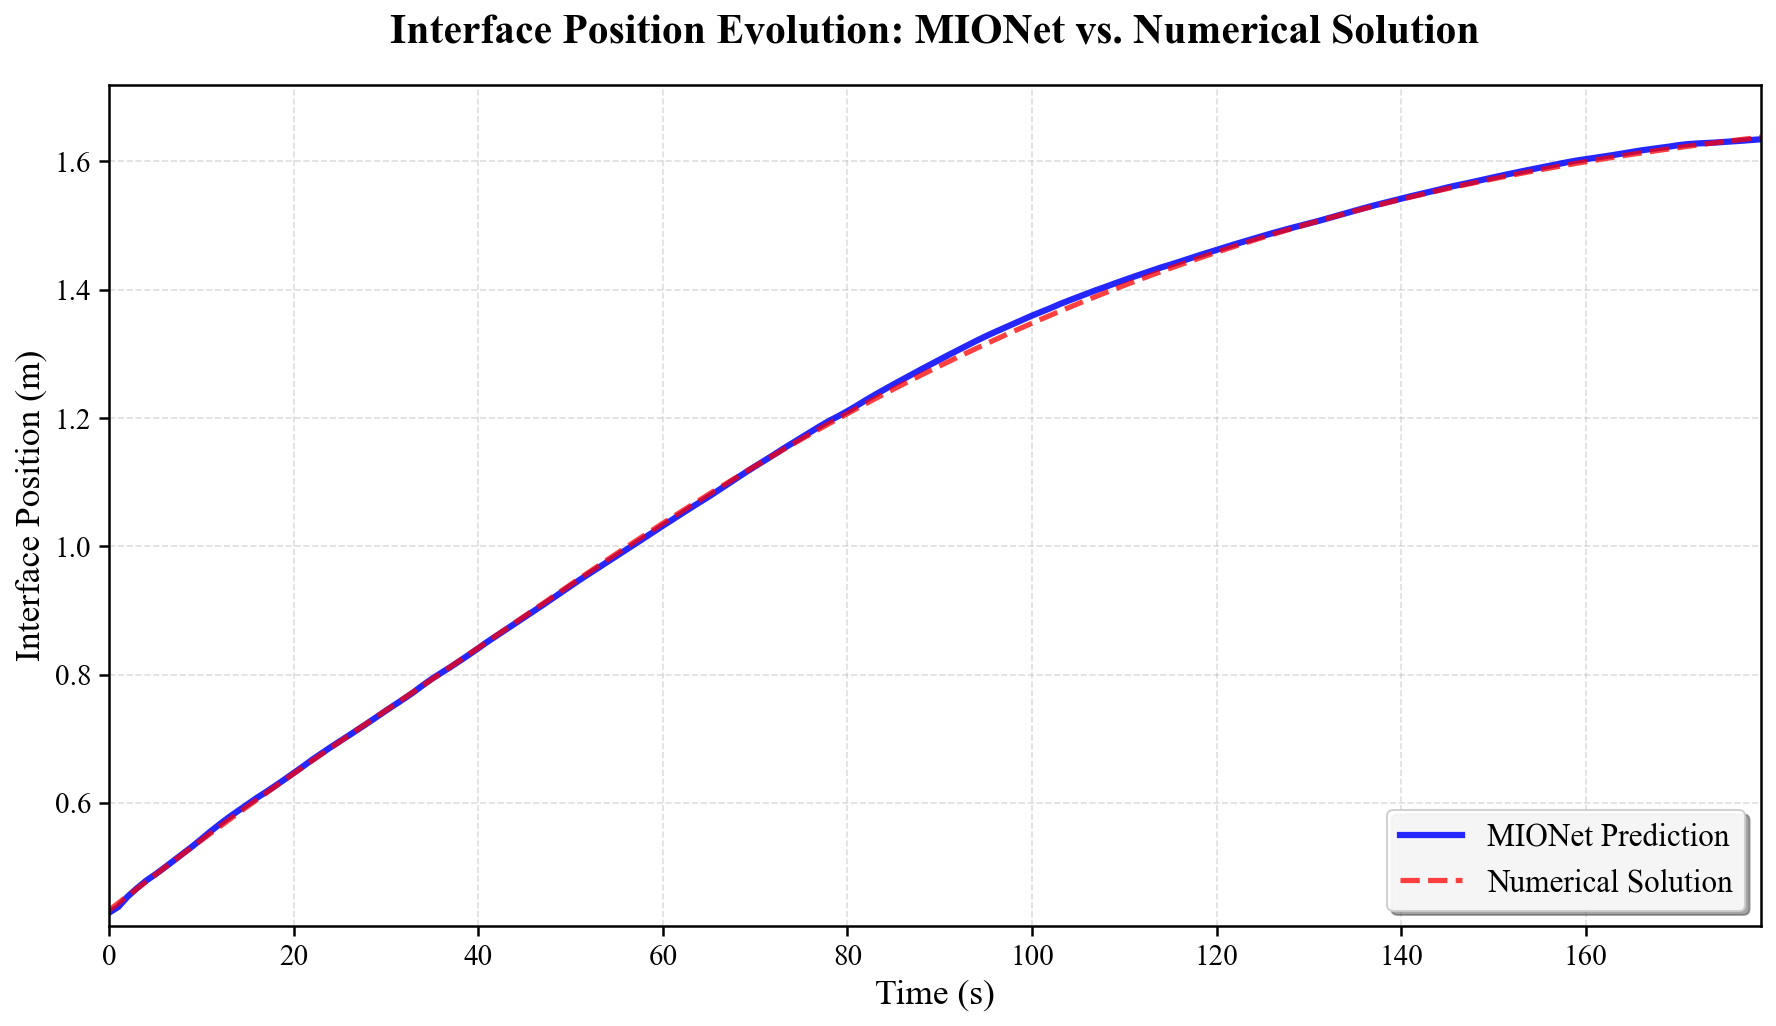

Interface Position Metrics:
  MSE:   0.00002314 m²
  RMSE:  0.00481045 m
  RRMSE: 0.00404610
  MAE:   0.00355301 m


In [27]:
# ============================================================
# 图3: 界面位置 lts 预测值与数值解对比 (2D Line Plot)
# ============================================================
fig3 = plt.figure(figsize=(12, 7), dpi=150)
ax3 = fig3.add_subplot(111)

# 绘制预测解和真实解曲线
line1, = ax3.plot(time, lts_predict, 'b-', linewidth=3.0, label='MIONet Prediction', alpha=0.85)
line2, = ax3.plot(time, lt0, 'r--', linewidth=2.5, label='Numerical Solution', alpha=0.75)

# 设置标题和坐标轴标签(放大字体)
ax3.set_title('Interface Position Evolution: MIONet vs. Numerical Solution',
              fontsize=20, fontweight='bold', pad=20)
ax3.set_xlabel('Time (s)', fontsize=17)
ax3.set_ylabel('Interface Position (m)', fontsize=17)

# 美化网格
ax3.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
ax3.set_axisbelow(True)

# 设置图例(放大)
ax3.legend(loc='lower right', fontsize=15, frameon=True, shadow=True, 
           fancybox=True, framealpha=0.9)

# 设置坐标轴范围和刻度(放大刻度标签)
ax3.set_xlim([0, max(time)])
ax3.set_ylim([min(min(lts_predict), min(lt0)) * 0.95, 
              max(max(lts_predict), max(lt0)) * 1.05])
ax3.tick_params(labelsize=14)

# 计算误差统计(仅用于打印,不显示在图上)
mse_lts = np.mean((lts_predict - lt0) ** 2)
rmse_lts = np.sqrt(mse_lts)
rrmse_lts = rmse_lts / np.mean(np.abs(lt0))
mae_lts = np.mean(np.abs(lts_predict - lt0))

plt.tight_layout()
plt.show()

print(f"Interface Position Metrics:")
print(f"  MSE:   {mse_lts:.8f} m²")
print(f"  RMSE:  {rmse_lts:.8f} m")
print(f"  RRMSE: {rrmse_lts:.8f}")
print(f"  MAE:   {mae_lts:.8f} m")


/tmp/ipykernel_34160/1078499020.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=1, h_pad=1.0)


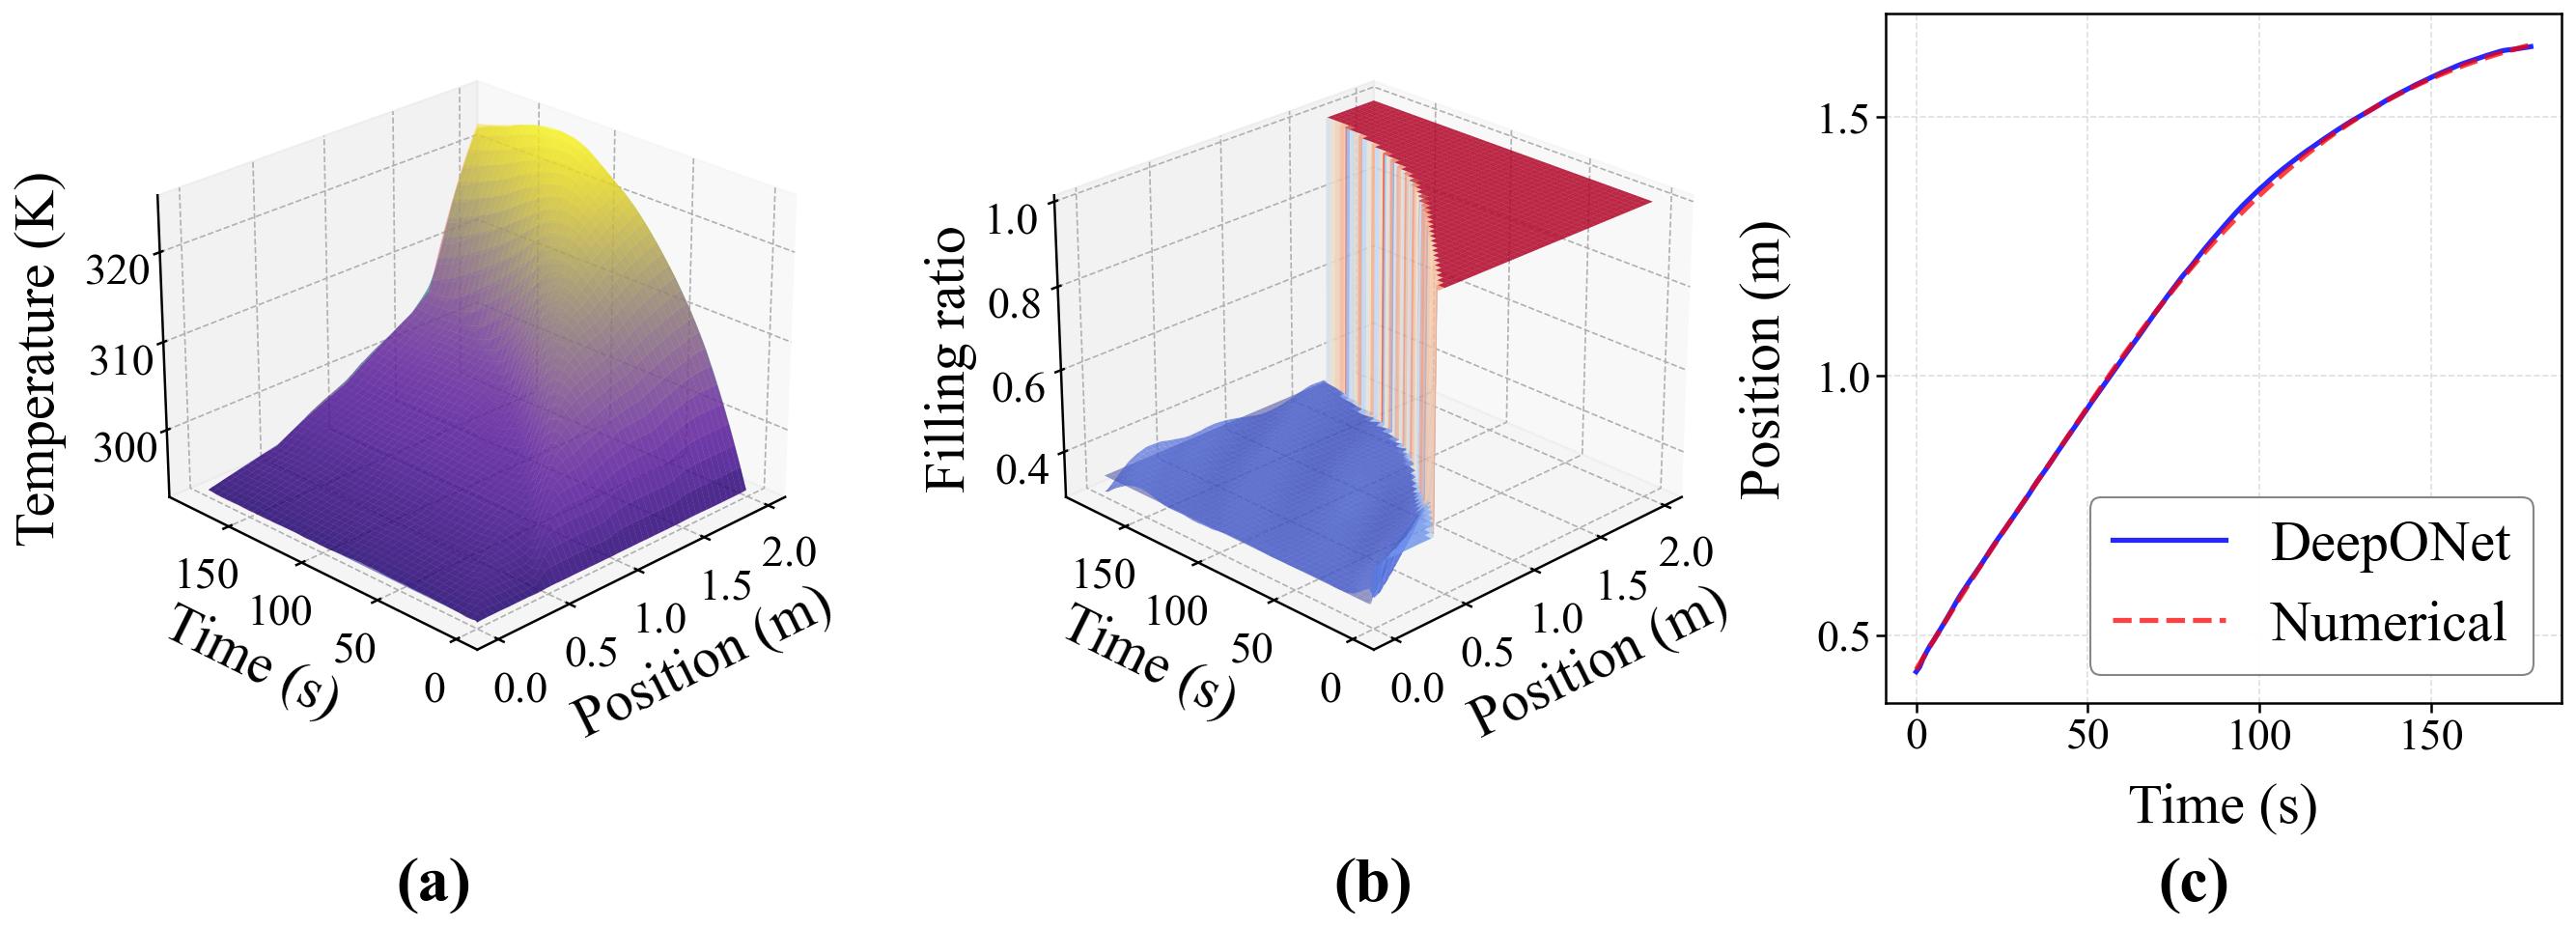

In [28]:
# ============================================================
# 整合图: 3列1行综合展示所有对比结果 (符合学术论文规范)
# ============================================================
from mpl_toolkits.mplot3d import Axes3D
# 1. 导入GridSpec用于自定义宽度比例
from matplotlib.gridspec import GridSpec

# 调整图片尺寸，增加底部和右侧空间用于放置标签
fig_combined = plt.figure(figsize=(22, 7), dpi=150)

# 2. 定义1行3列网格，设置宽度比例：前两列1:1，第三列0.6（子图3缩小）
# wspace=0.3：控制子图间的水平间距，避免拥挤
gs = GridSpec(1, 3, figure=fig_combined, width_ratios=[1, 1, 0.9], wspace=0.2)

# -------------------- 子图1: 温度场对比 (a图) --------------------
# 3. 基于GridSpec第0列创建子图（替代原131）
ax1 = fig_combined.add_subplot(gs[0], projection='3d')

surf1_1 = ax1.plot_surface(X, Y, Ts_predict, cmap='viridis', alpha=0.7,
                            linewidth=0, antialiased=True)
surf1_2 = ax1.plot_surface(X, Y, Ts, cmap='plasma', alpha=0.5,
                            linewidth=0, antialiased=True)

# 设置坐标轴标签（代码不变）
ax1.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax1.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax1.text2D(-0.12, 0.5, "Temperature (K)",
           transform=ax1.transAxes,
           fontsize=28, rotation=90,
           va="center", ha="center")
ax1.view_init(elev=25, azim=225)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax1.tick_params(labelsize=22, pad=4)
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=5)
ax1.locator_params(axis='z', nbins=5)

# -------------------- 子图2: 固相分数对比 (b图) --------------------
# 4. 基于GridSpec第1列创建子图（替代原132）
ax2 = fig_combined.add_subplot(gs[1], projection='3d')

# 准备固相分数数据（代码不变）
L = 2
fps_predict0 = np.ones((tmax, Z))
fps0 = np.ones((tmax, Z))
for i in range(tmax):
    K_predict = int(np.floor(lts_predict[i] / (L / Z)))
    fps_predict0[i, :K_predict] = fps_predict[i, :K_predict]
    K = int(np.floor(lt0[i] / (L / Z)))
    fps0[i, :K] = fp[i, :K]

surf2_1 = ax2.plot_surface(X, Y, fps_predict0, cmap='coolwarm', alpha=0.7,
                            linewidth=0, antialiased=True)
surf2_2 = ax2.plot_surface(X, Y, fps0, cmap='RdYlBu_r', alpha=0.5,
                            linewidth=0, antialiased=True)

# 设置坐标轴标签（代码不变）
ax2.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax2.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax2.text2D(-0.10, 0.5, "Filling ratio",
           transform=ax2.transAxes,
           fontsize=28, rotation=90,
           va="center", ha="center")
ax2.view_init(elev=25, azim=225)
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax2.tick_params(labelsize=22, pad=4)
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='z', nbins=5)

# -------------------- 子图3: 界面位置对比 (c图) --------------------
# 5. 基于GridSpec第2列创建子图（替代原133，宽度缩小）
ax3 = fig_combined.add_subplot(gs[2])

ax3.plot(time, lts_predict, 'b-', linewidth=2.5, label='DeepONet', alpha=0.85)
ax3.plot(time, lt0, 'r--', linewidth=2.5, label='Numerical', alpha=0.75)

# 设置坐标轴标签（代码不变）
ax3.set_xlabel('Time (s)', fontsize=28, labelpad=12)
ax3.set_ylabel('Position (m)', fontsize=28, labelpad=12, rotation=90)
ax3.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
ax3.set_axisbelow(True)
ax3.legend(loc='lower right', fontsize=28, frameon=True, shadow=False, 
            fancybox=True, framealpha=0.95, edgecolor='gray')
ax3.tick_params(labelsize=22, pad=2)
fig_combined.subplots_adjust(bottom=0.2)  # 增大图形底部边距，避免重叠
# ax3.subplots_adjust(bottom=0.2)  # 增大子图底部边距
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=5)

# 计算误差统计(仅用于打印)（代码不变）
mse_ts = np.mean((Ts_predict - Ts) ** 2)
rmse_ts = np.sqrt(mse_ts)
mse_fps = np.mean((fps_predict0 - fps0) ** 2)
rmse_fps = np.sqrt(mse_fps)
mse_lts = np.mean((lts_predict - lt0) ** 2)
rmse_lts = np.sqrt(mse_lts)

# 6. 修正tight_layout：删除错误rect参数，自动优化布局
plt.tight_layout(w_pad=1, h_pad=1.0)

# 7. 调整底部标签位置（根据新宽度比例计算中心x坐标）
total_ratio = 1 + 1 + 0.6  # 总比例和
a_x = (0 + 1/2) / total_ratio +0.04 # 子图1中心：(0 + 0.5)/2.6 ≈ 0.19
b_x = (1 + 1/2) / total_ratio -0.05 # 子图2中心：(1 + 0.5)/2.6 ≈ 0.58
c_x = (1+1 + 0.6/2) / total_ratio -0.10 # 子图3中心：(2 + 0.3)/2.6 ≈ 0.88

fig_combined.text(a_x, 0.02, '(a)', ha='center', va='center', 
                    fontsize=32, fontweight='bold')
fig_combined.text(b_x, 0.02, '(b)', ha='center', va='center', 
                    fontsize=32, fontweight='bold')
fig_combined.text(c_x, 0.02, '(c)', ha='center', va='center', 
                    fontsize=32, fontweight='bold')

# 保存高质量图片
plt.savefig('model_evaluation_combined.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_34160/1429186358.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=1, h_pad=1.0)


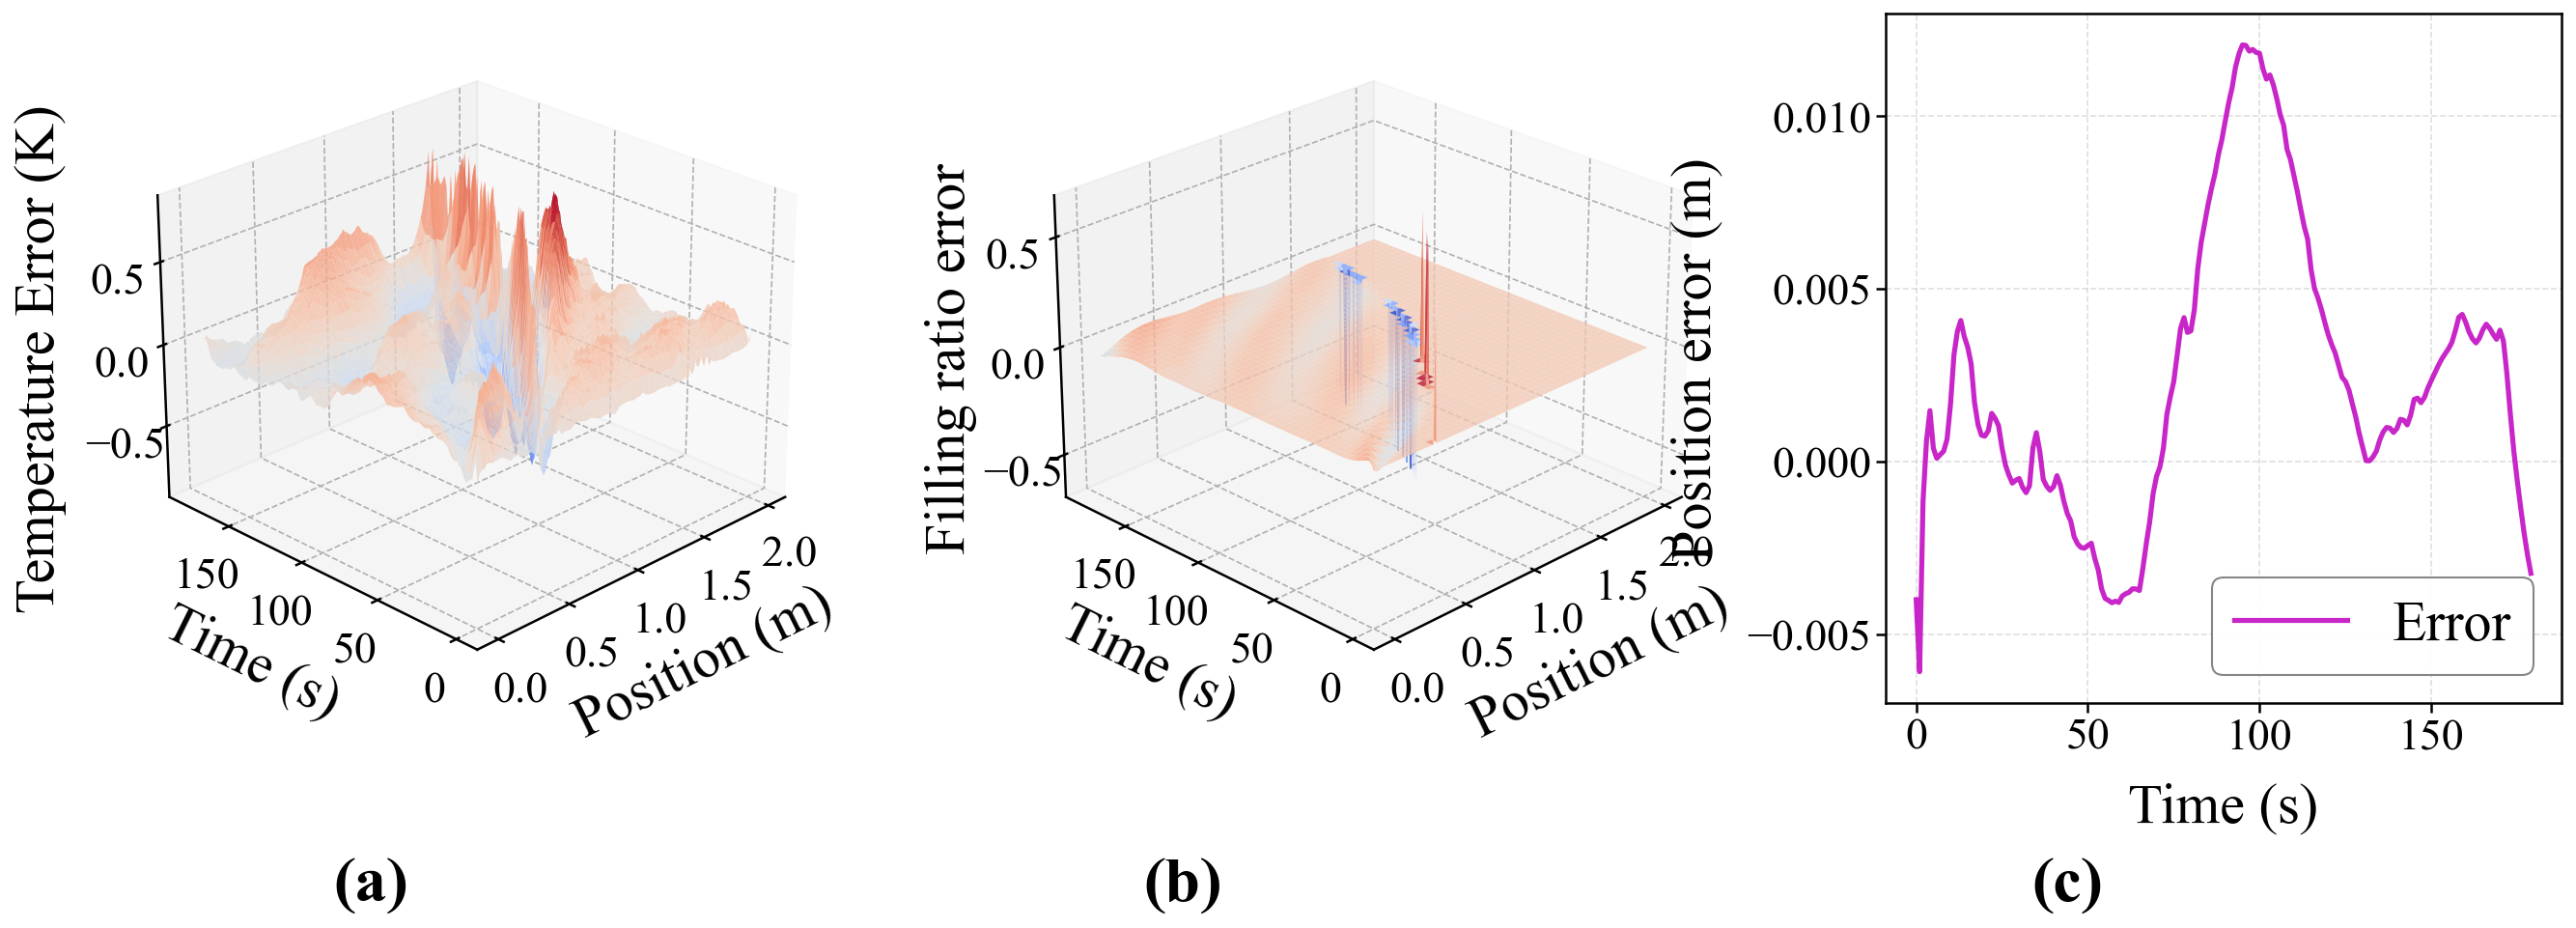

In [29]:
# ============================================================
# 误差图: 3列1行综合展示所有误差结果 (与上一单元格风格一致)
# ============================================================
from matplotlib.gridspec import GridSpec

# 调整图片尺寸，增加底部和右侧空间用于放置标签
fig_error = plt.figure(figsize=(22, 7), dpi=150)

# 定义1行3列网格，设置宽度比例：前两列1:1，第三列0.9（与对比图一致）
gs = GridSpec(1, 3, figure=fig_error, width_ratios=[1, 1, 0.9], wspace=0.2)

# -------------------- 子图1: 温度场误差 (a图) --------------------
ax1_err = fig_error.add_subplot(gs[0], projection='3d')

Ts_error = Ts_predict - Ts
surf1_err = ax1_err.plot_surface(X, Y, Ts_error, cmap='coolwarm', alpha=0.8, 
                                  linewidth=0, antialiased=True)

ax1_err.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax1_err.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax1_err.text2D(-0.12, 0.5, "Temperature Error (K)",
               transform=ax1_err.transAxes,
               fontsize=28, rotation=90,
               va="center", ha="center")
ax1_err.view_init(elev=25, azim=225)
ax1_err.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax1_err.tick_params(labelsize=22, pad=4)
ax1_err.locator_params(axis='x', nbins=5)
ax1_err.locator_params(axis='y', nbins=5)
ax1_err.locator_params(axis='z', nbins=5)

# -------------------- 子图2: 固相分数误差 (b图) --------------------
ax2_err = fig_error.add_subplot(gs[1], projection='3d')

fps_error = fps_predict0 - fps0
surf2_err = ax2_err.plot_surface(X, Y, fps_error, cmap='coolwarm', alpha=0.8, 
                                  linewidth=0, antialiased=True)

ax2_err.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax2_err.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax2_err.text2D(-0.10, 0.5, "Filling ratio error",
               transform=ax2_err.transAxes,
               fontsize=28, rotation=90,
               va="center", ha="center")
ax2_err.view_init(elev=25, azim=225)
ax2_err.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax2_err.tick_params(labelsize=22, pad=4)
ax2_err.locator_params(axis='x', nbins=5)
ax2_err.locator_params(axis='y', nbins=5)
ax2_err.locator_params(axis='z', nbins=5)

# -------------------- 子图3: 界面位置误差 (c图) --------------------
ax3_err = fig_error.add_subplot(gs[2])

lts_error = lts_predict - lt0
ax3_err.plot(time, lts_error, 'm-', linewidth=2.5, label='Error', alpha=0.85)

ax3_err.set_xlabel('Time (s)', fontsize=28, labelpad=12)
ax3_err.set_ylabel('Position error (m)', fontsize=28, labelpad=12, rotation=90)
ax3_err.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
ax3_err.set_axisbelow(True)
ax3_err.legend(loc='lower right', fontsize=28, frameon=True, shadow=False, 
               fancybox=True, framealpha=0.95, edgecolor='gray')
ax3_err.tick_params(labelsize=22, pad=2)
fig_error.subplots_adjust(bottom=0.2)  # 增大图形底部边距，避免重叠
ax3_err.locator_params(axis='x', nbins=5)
ax3_err.locator_params(axis='y', nbins=5)

# 修正tight_layout：自动优化布局
plt.tight_layout(w_pad=1, h_pad=1.0)

# 调整底部标签位置（根据新宽度比例计算中心x坐标）
total_ratio = 1 + 1 + 0.9  # 总比例和
a_x = (0 + 1/2) / total_ratio + 0.04  # 子图1中心
b_x = (1 + 1/2) / total_ratio - 0.05  # 子图2中心
c_x = (1+1 + 0.9/2) / total_ratio - 0.10  # 子图3中心

fig_error.text(a_x, 0.02, '(a)', ha='center', va='center', 
               fontsize=32, fontweight='bold')
fig_error.text(b_x, 0.02, '(b)', ha='center', va='center', 
               fontsize=32, fontweight='bold')
fig_error.text(c_x, 0.02, '(c)', ha='center', va='center', 
               fontsize=32, fontweight='bold')

# 保存高质量误差图片
plt.savefig('model_error_combined.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:

print("\n" + "="*70)
print("COMPREHENSIVE MODEL EVALUATION SUMMARY")
print("="*70)
print(f"\n1. Temperature Field (Ts):")
print(f"   RMSE:  {rmse_ts:.6f} K")
print(f"   RRMSE: {rmse_ts/np.mean(np.abs(Ts)):.6f}")
print(f"   MAE:   {np.mean(np.abs(Ts_predict - Ts)):.6f} K")
print(f"\n2. Filling Ratio (fps):")
print(f"   RMSE:  {rmse_fps:.8f}")
print(f"   RRMSE: {rmse_fps/np.mean(np.abs(fps0)) if np.mean(np.abs(fps0))>0 else 0:.8f}")
print(f"   MAE:   {np.mean(np.abs(fps_predict0 - fps0)):.8f}")
print(f"\n3. Interface Position (lts):")
print(f"   RMSE:  {rmse_lts:.8f} m")
print(f"   RRMSE: {rmse_lts/np.mean(np.abs(lt0)):.8f}")
print(f"   MAE:   {np.mean(np.abs(lts_predict - lt0)):.8f} m")
print("="*70)
print("\nFigure saved as: model_evaluation_combined.png")



COMPREHENSIVE MODEL EVALUATION SUMMARY

1. Temperature Field (Ts):
   RMSE:  0.192918 K
   RRMSE: 0.000640
   MAE:   0.132478 K

2. Filling Ratio (fps):
   RMSE:  0.02816717
   RRMSE: 0.04600003
   MAE:   0.00525591

3. Interface Position (lts):
   RMSE:  0.00481045 m
   RRMSE: 0.00404610
   MAE:   0.00355301 m

Figure saved as: model_evaluation_combined.png


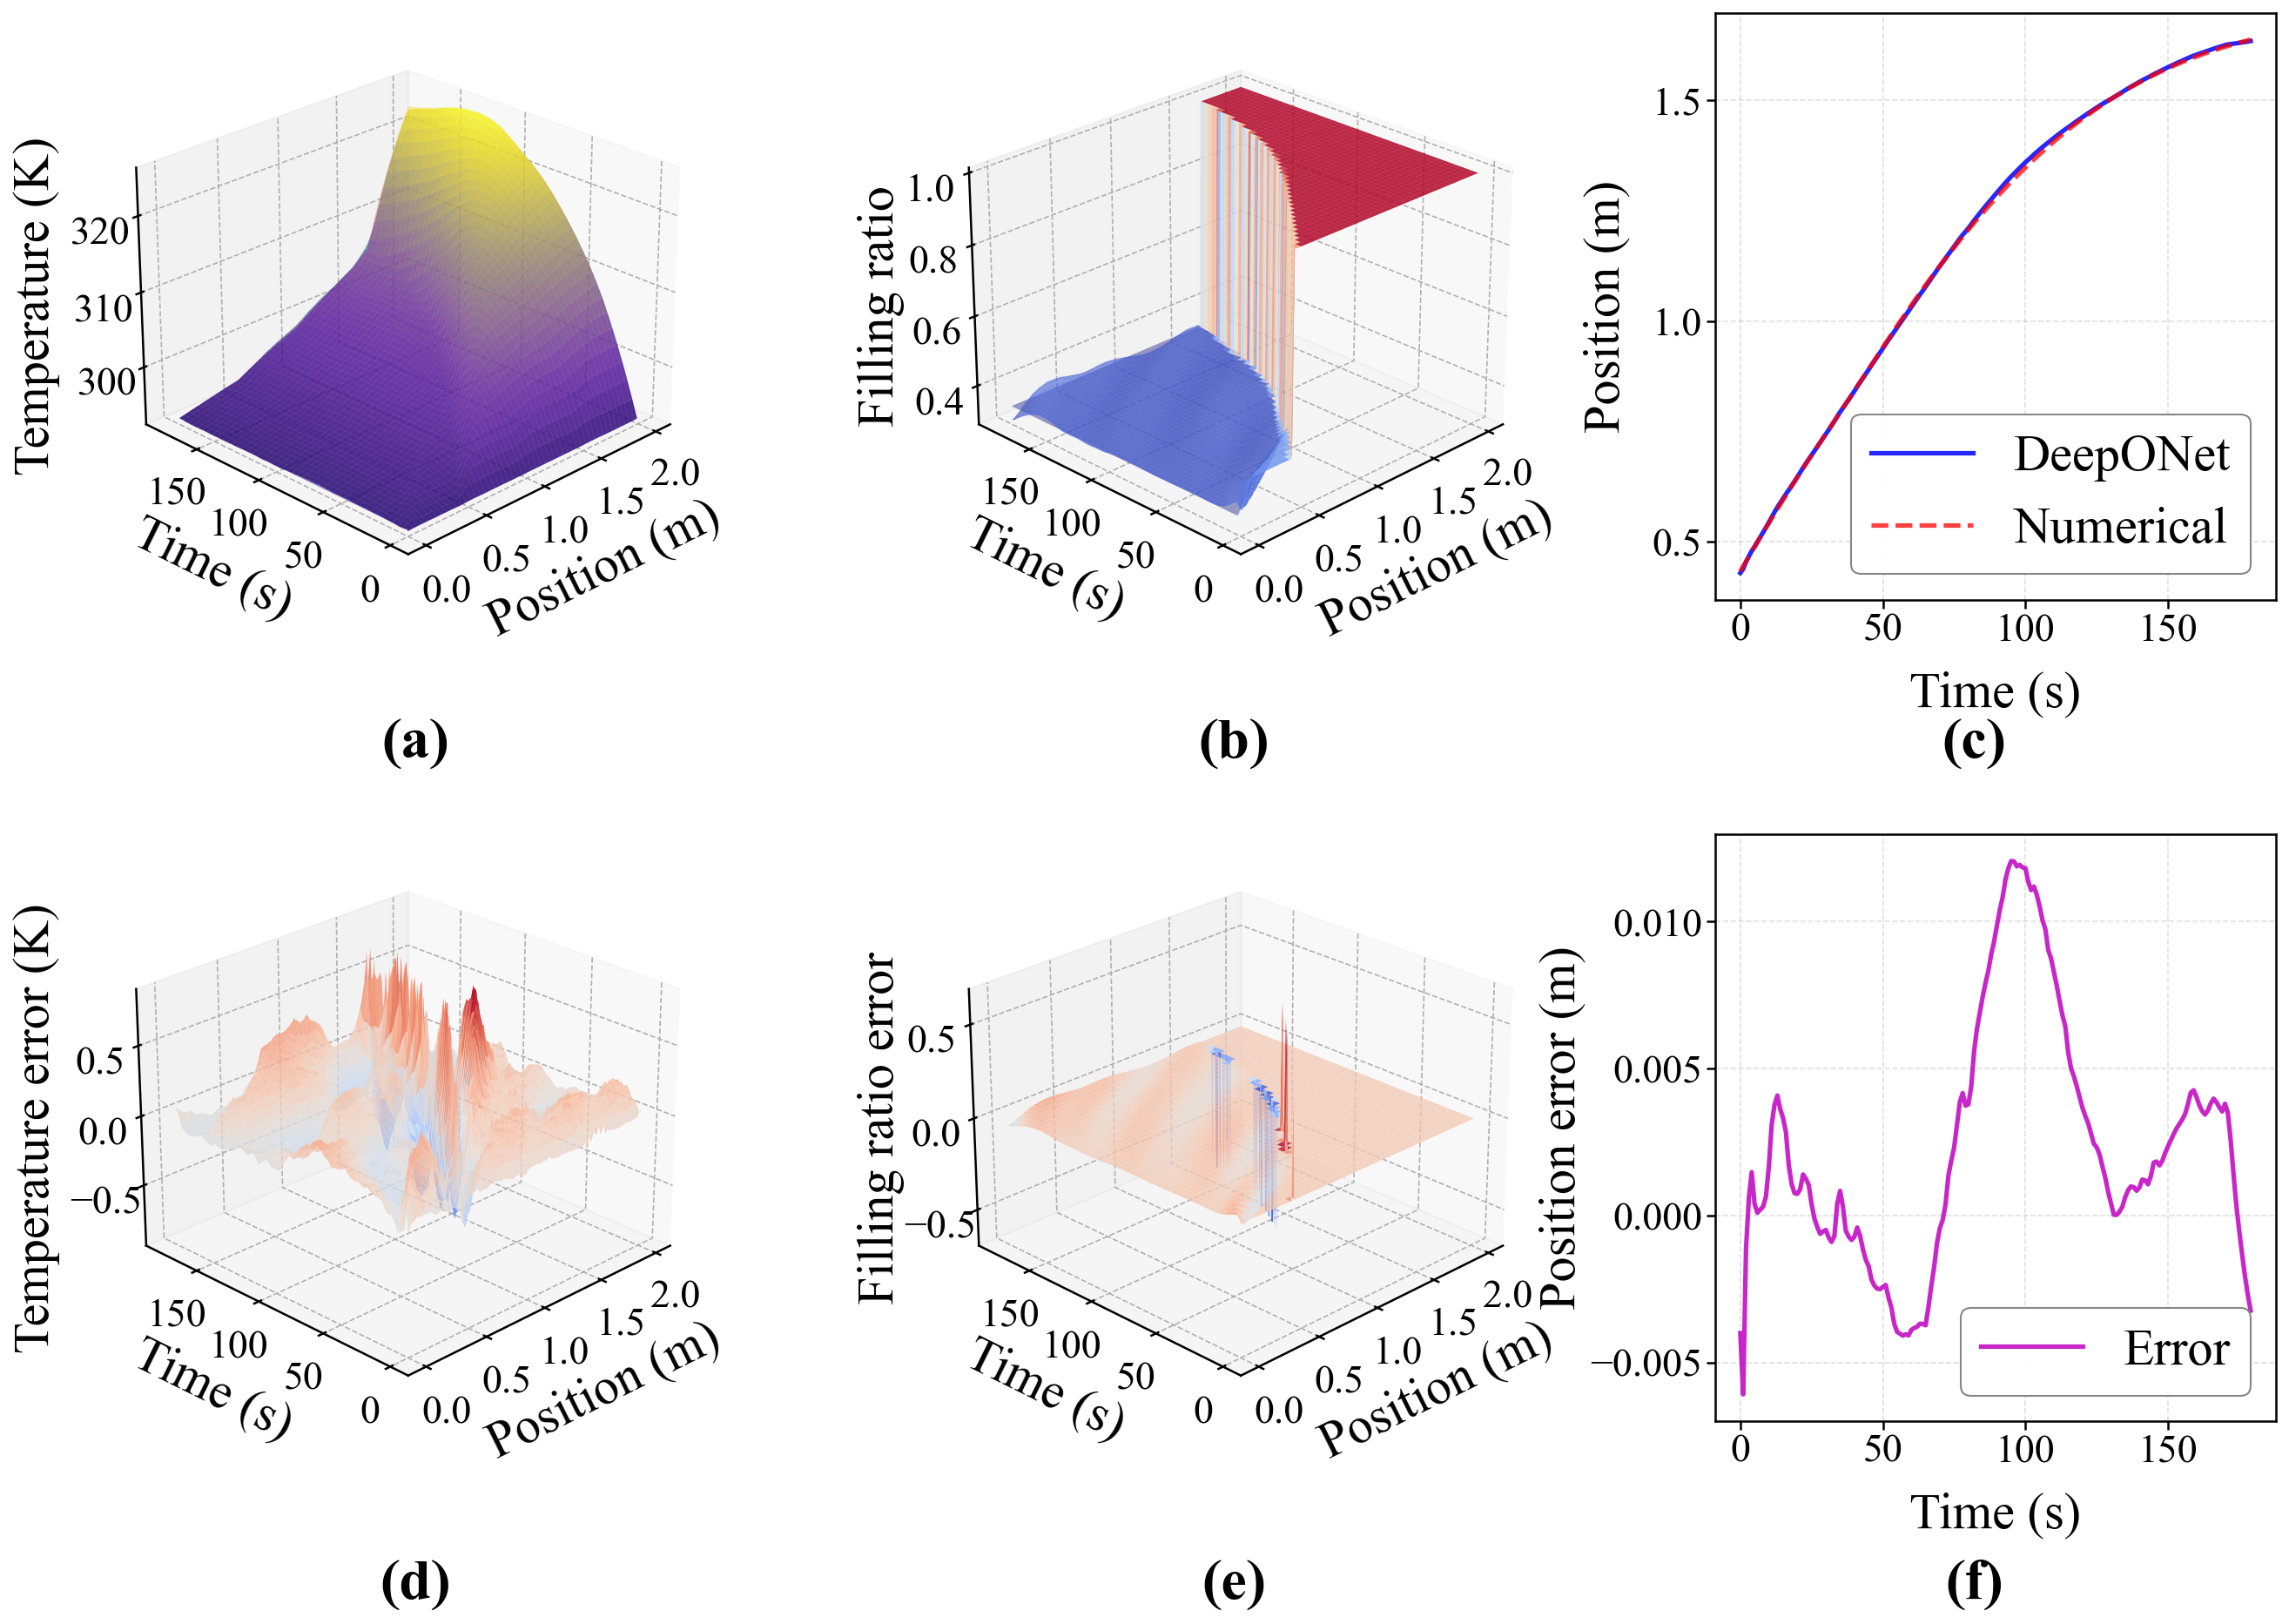


COMPREHENSIVE FIGURE SAVED
Filename: model_comprehensive_evaluation.png
Layout: 2 rows × 3 columns
  Row 1: (a) Temperature, (b) Filling Ratio, (c) Interface Position
  Row 2: (d) Temp Error, (e) Filling Error, (f) Position Error


In [33]:
# ============================================================
# 综合图: 2行3列整合对比图与误差图 (符合学术论文规范)
# ============================================================
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

# 创建2行3列的图形，调整图片尺寸
fig_all = plt.figure(figsize=(22, 14), dpi=150)

# 定义2行3列网格，设置宽度比例：前两列1:1，第三列0.9
# hspace控制行间距，wspace控制列间距
gs = GridSpec(2, 3, figure=fig_all, width_ratios=[1, 1, 0.8], 
              wspace=0.2, hspace=0.4)

# ==================== 第一行：对比图 ====================

# -------------------- 子图1(a): 温度场对比 --------------------
ax1 = fig_all.add_subplot(gs[0, 0], projection='3d')

surf1_1 = ax1.plot_surface(X, Y, Ts_predict, cmap='viridis', alpha=0.7,
                            linewidth=0, antialiased=True)
surf1_2 = ax1.plot_surface(X, Y, Ts, cmap='plasma', alpha=0.5,
                            linewidth=0, antialiased=True)

ax1.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax1.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax1.text2D(-0.12, 0.5, "Temperature (K)",
           transform=ax1.transAxes,
           fontsize=28, rotation=90,
           va="center", ha="center")
ax1.view_init(elev=25, azim=225)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax1.tick_params(labelsize=22, pad=4)
ax1.locator_params(axis='x', nbins=5)
ax1.locator_params(axis='y', nbins=5)
ax1.locator_params(axis='z', nbins=5)

# -------------------- 子图2(b): 固相分数对比 --------------------
ax2 = fig_all.add_subplot(gs[0, 1], projection='3d')

# 准备固相分数数据
L = 2
fps_predict0 = np.ones((tmax, Z))
fps0 = np.ones((tmax, Z))
for i in range(tmax):
    K_predict = int(np.floor(lts_predict[i] / (L / Z)))
    fps_predict0[i, :K_predict] = fps_predict[i, :K_predict]
    K = int(np.floor(lt0[i] / (L / Z)))
    fps0[i, :K] = fp[i, :K]

surf2_1 = ax2.plot_surface(X, Y, fps_predict0, cmap='coolwarm', alpha=0.7,
                            linewidth=0, antialiased=True)
surf2_2 = ax2.plot_surface(X, Y, fps0, cmap='RdYlBu_r', alpha=0.5,
                            linewidth=0, antialiased=True)

ax2.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax2.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax2.text2D(-0.10, 0.5, "Filling ratio",
           transform=ax2.transAxes,
           fontsize=28, rotation=90,
           va="center", ha="center")
ax2.view_init(elev=25, azim=225)
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax2.tick_params(labelsize=22, pad=4)
ax2.locator_params(axis='x', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='z', nbins=5)

# -------------------- 子图3(c): 界面位置对比 --------------------
ax3 = fig_all.add_subplot(gs[0, 2])

ax3.plot(time, lts_predict, 'b-', linewidth=2.5, label='DeepONet', alpha=0.85)
ax3.plot(time, lt0, 'r--', linewidth=2.5, label='Numerical', alpha=0.75)

ax3.set_xlabel('Time (s)', fontsize=28, labelpad=12)
ax3.set_ylabel('Position (m)', fontsize=28, labelpad=12, rotation=90)
ax3.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
ax3.set_axisbelow(True)
ax3.legend(loc='lower right', fontsize=28, frameon=True, shadow=False, 
           fancybox=True, framealpha=0.95, edgecolor='gray')
ax3.tick_params(labelsize=22, pad=2)
ax3.locator_params(axis='x', nbins=5)
ax3.locator_params(axis='y', nbins=5)

# ==================== 第二行：误差图 ====================

# -------------------- 子图4(d): 温度场误差 --------------------
ax4 = fig_all.add_subplot(gs[1, 0], projection='3d')

Ts_error = Ts_predict - Ts
surf4 = ax4.plot_surface(X, Y, Ts_error, cmap='coolwarm', alpha=0.8,
                          linewidth=0, antialiased=True)

ax4.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax4.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax4.text2D(-0.12, 0.5, "Temperature error (K)",
           transform=ax4.transAxes,
           fontsize=28, rotation=90,
           va="center", ha="center")
ax4.view_init(elev=25, azim=225)
ax4.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax4.tick_params(labelsize=22, pad=4)
ax4.locator_params(axis='x', nbins=5)
ax4.locator_params(axis='y', nbins=5)
ax4.locator_params(axis='z', nbins=5)

# -------------------- 子图5(e): 固相分数误差 --------------------
ax5 = fig_all.add_subplot(gs[1, 1], projection='3d')

fps_error = fps_predict0 - fps0
surf5 = ax5.plot_surface(X, Y, fps_error, cmap='coolwarm', alpha=0.8,
                          linewidth=0, antialiased=True)

ax5.set_xlabel('Position (m)', fontsize=28, labelpad=15)
ax5.set_ylabel('Time (s)', fontsize=28, labelpad=15)
ax5.text2D(-0.10, 0.5, "Filling ratio error",
           transform=ax5.transAxes,
           fontsize=28, rotation=90,
           va="center", ha="center")
ax5.view_init(elev=25, azim=225)
ax5.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax5.tick_params(labelsize=22, pad=4)
ax5.locator_params(axis='x', nbins=5)
ax5.locator_params(axis='y', nbins=5)
ax5.locator_params(axis='z', nbins=5)

# -------------------- 子图6(f): 界面位置误差 --------------------
ax6 = fig_all.add_subplot(gs[1, 2])

lts_error = lts_predict - lt0
ax6.plot(time, lts_error, 'm-', linewidth=2.5, label='Error', alpha=0.85)

ax6.set_xlabel('Time (s)', fontsize=28, labelpad=12)
ax6.set_ylabel('Position error (m)', fontsize=28, labelpad=2, rotation=90)
ax6.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)
ax6.set_axisbelow(True)
ax6.legend(loc='lower right', fontsize=28, frameon=True, shadow=False, 
           fancybox=True, framealpha=0.95, edgecolor='gray')
ax6.tick_params(labelsize=22, pad=2)
ax6.locator_params(axis='x', nbins=5)
ax6.locator_params(axis='y', nbins=5)

# 优化整体布局
# plt.tight_layout(w_pad=0.8, h_pad=1.5)

# 添加子图标签 (a)-(f)
# 计算每个子图中心位置
total_ratio = 1 + 1 + 0.9
col1_x = (0 + 1/2) / total_ratio + 0.08
col2_x = (1 + 1/2) / total_ratio +0.02
col3_x = (1+1 + 0.9/2) / total_ratio - 0.05

# 第一行标签 y坐标
row1_y = 0.48
# 第二行标签 y坐标
row2_y = 0.02

fig_all.text(col1_x, row1_y, '(a)', ha='center', va='center', 
             fontsize=32, fontweight='bold')
fig_all.text(col2_x, row1_y, '(b)', ha='center', va='center', 
             fontsize=32, fontweight='bold')
fig_all.text(col3_x, row1_y, '(c)', ha='center', va='center', 
             fontsize=32, fontweight='bold')
fig_all.text(col1_x, row2_y, '(d)', ha='center', va='center', 
             fontsize=32, fontweight='bold')
fig_all.text(col2_x, row2_y, '(e)', ha='center', va='center', 
             fontsize=32, fontweight='bold')
fig_all.text(col3_x, row2_y, '(f)', ha='center', va='center', 
             fontsize=32, fontweight='bold')

# 保存高质量综合图片
plt.savefig('model_comprehensive_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("COMPREHENSIVE FIGURE SAVED")
print("="*70)
print("Filename: model_comprehensive_evaluation.png")
print("Layout: 2 rows × 3 columns")
print("  Row 1: (a) Temperature, (b) Filling Ratio, (c) Interface Position")
print("  Row 2: (d) Temp Error, (e) Filling Error, (f) Position Error")
print("="*70)